In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("results.csv")


In [36]:
import numpy as np

# Focus on Train Accuracy columns per prompt
# train_cols = [c for c in df.columns if c.startswith("Train_Accuracy")]
# mean_train = df.groupby("Layer").mean()["Train_Accuracy"]
# f = lambda x: x - mean_train[0]
# mean_train.apply(f)


train_pivot = df.pivot(
    index="Layer",
    columns="Context_Level",
    values="Train_Accuracy"
)

#Diff of avgs
# mean_train = train_pivot.mean(axis = 1)
# f = lambda x: x - mean_train[0]
# mean_train.apply(f)


# Avg of diffs

#Each row in heatmap minus first row
# train_pivot
f = lambda x: x - train_pivot.iloc[0]
diff_train = train_pivot.apply(f, axis = 1)
mean_train = diff_train.mean(axis = 1)
mean_train



# # We'll do this per layer
# results = []

# for layer, g in df.groupby("Layer"):
#     g = g.reset_index(drop=True)
    
#     baseline = g.loc[0, train_cols]
#     print(baseline)
    
#     # Method 1: subtract baseline row first, then average
#     avg_of_diffs = (g[train_cols] - baseline).mean(axis=1)
    
#     # Method 2: average first, then subtract baseline average
#     baseline_avg = baseline.mean()
#     diff_of_avgs = g[train_cols].mean(axis=1) - baseline_avg
    
#     results.append(
#         pd.DataFrame({
#             "Layer": layer,
#             "Context_Level": g["Context_Level"],
#             "Avg_of_Differences": avg_of_diffs,
#             "Difference_of_Averages": diff_of_avgs,
#             "Difference": avg_of_diffs - diff_of_avgs
#         })
#     )

# result_df = pd.concat(results, ignore_index=True)
# result_df.head()

Layer
0    0.000000
1    0.579429
2    0.579429
3    0.579429
4    0.579429
5    0.579429
6    0.579429
7    0.579429
8    0.579429
dtype: float64

In [3]:
def diff_vs_first_layer(df, value_col):
    pivot = (
        df.pivot(
            index="Layer",
            columns="Context_Level",
            values=value_col
        )
        .sort_index()
    )

    first_layer = pivot.iloc[0]
    diff = pivot.subtract(first_layer, axis=1)

    return diff


In [4]:
def plot_diff_heatmap(data, title, fmt="+.3f", cmap="plasma"):
    plt.figure(figsize=(10, 6))

    vmax = np.nanmax(np.abs(data.values))

    im = plt.imshow(
        data,
        aspect="auto",
        origin="lower",
        cmap=cmap,
        vmin=-vmax,
        vmax=vmax
    )

    plt.colorbar(im, label="Δ Accuracy vs Layer 0")

    plt.xticks(
        np.arange(len(data.columns)),
        data.columns,
        rotation=45,
        ha="right"
    )
    plt.yticks(
        np.arange(len(data.index)),
        data.index
    )

    # Annotate cells
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            val = data.iloc[i, j]
            if not pd.isna(val):
                plt.text(
                    j, i,
                    format(val, fmt),
                    ha="center",
                    va="center",
                    fontsize=8,
                    color="white" if val < data.values.max() * 0.7 else "black"
                )

    plt.xlabel("Context Level")
    plt.ylabel("Layer")
    plt.title(title)
    plt.tight_layout()
    plt.show()


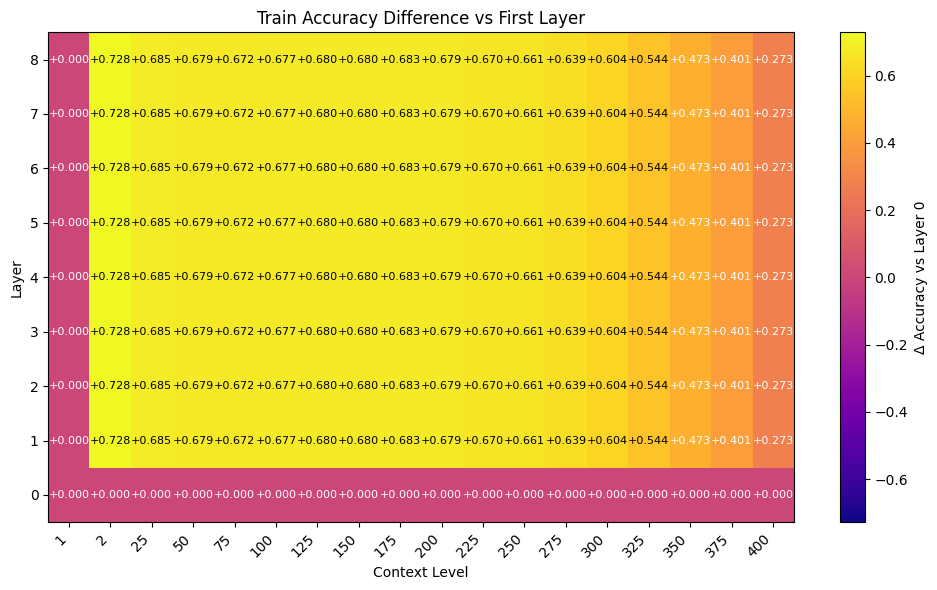

In [5]:
train_diff = diff_vs_first_layer(df, "Train_Accuracy")
plot_diff_heatmap(
    train_diff,
    "Train Accuracy Difference vs First Layer (Cumulative Accuracy)"
)


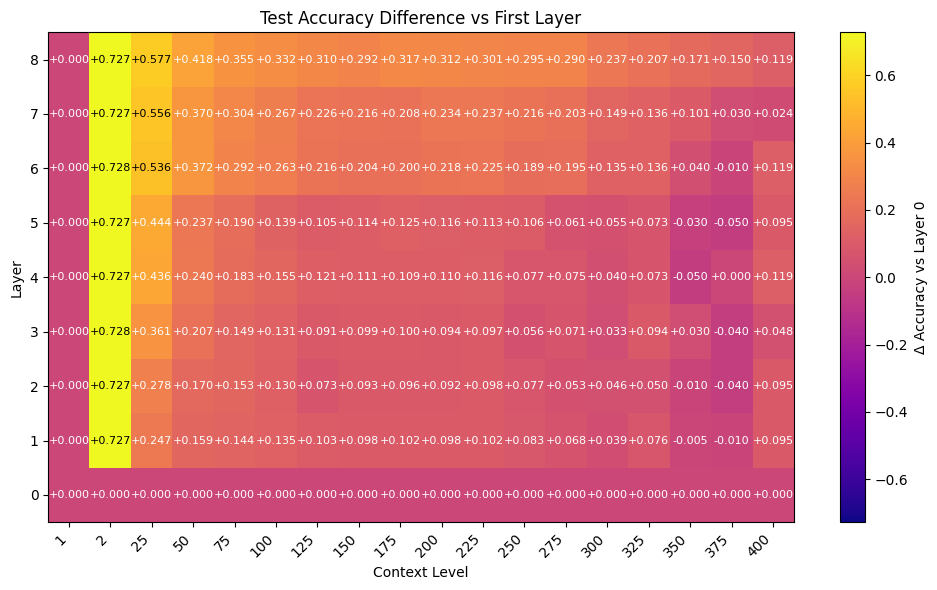

In [6]:
test_diff = diff_vs_first_layer(df, "Test_Accuracy")
plot_diff_heatmap(
    test_diff,
    "Test Accuracy Difference vs First Layer (Cumulative Accuracy)"
)


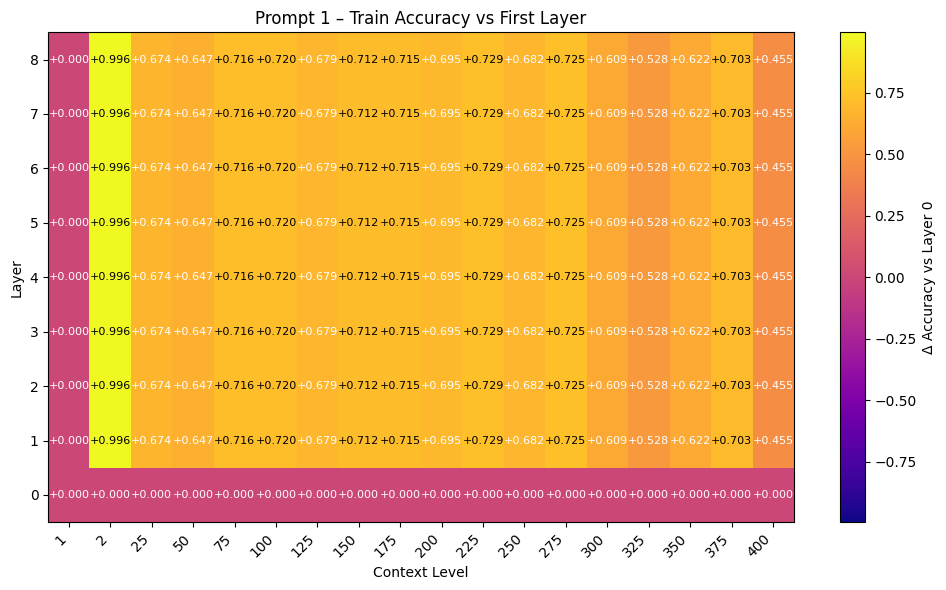

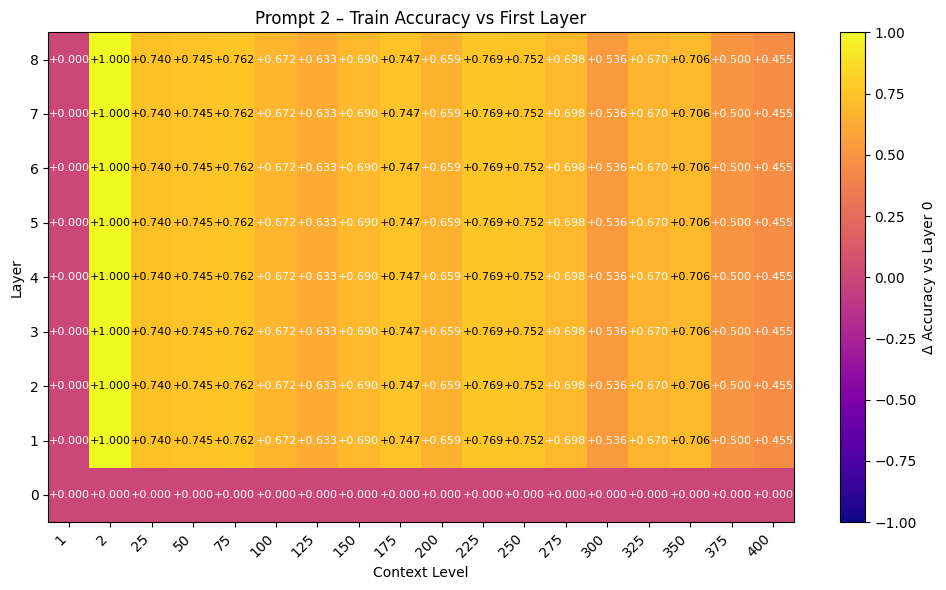

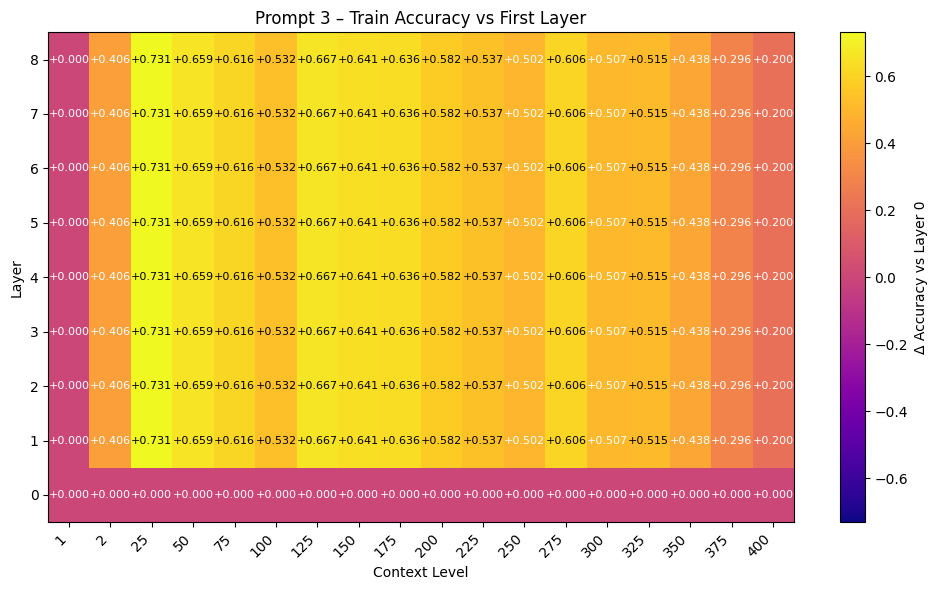

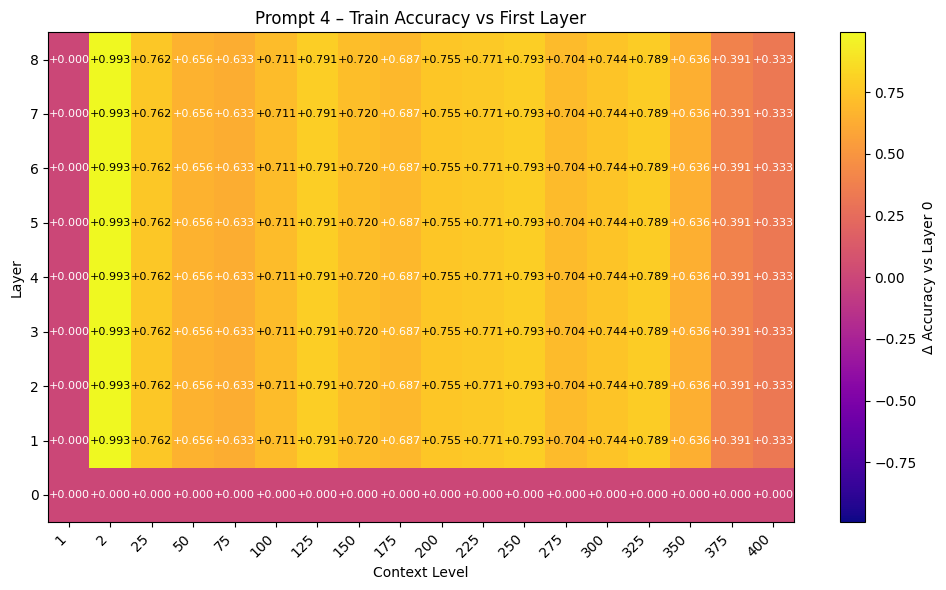

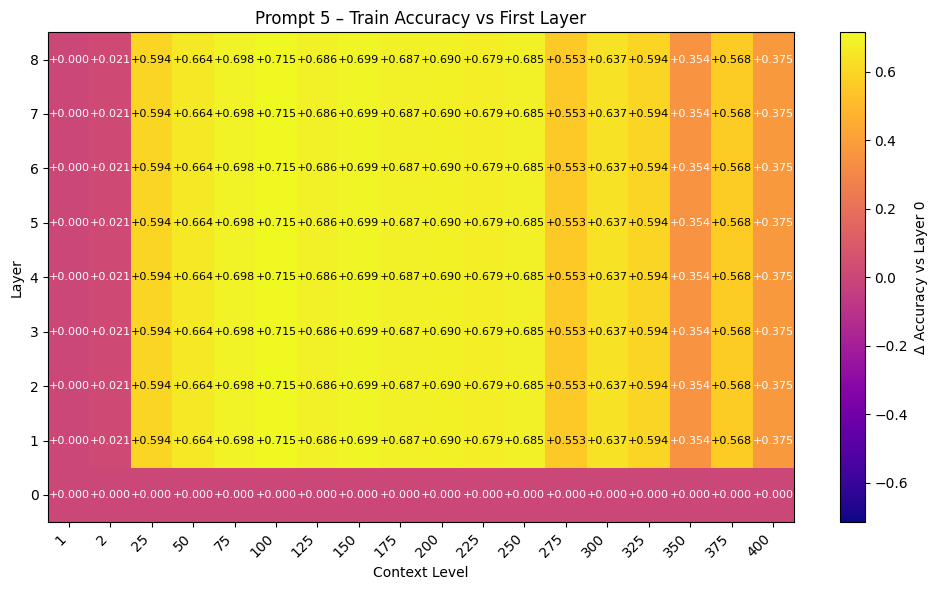

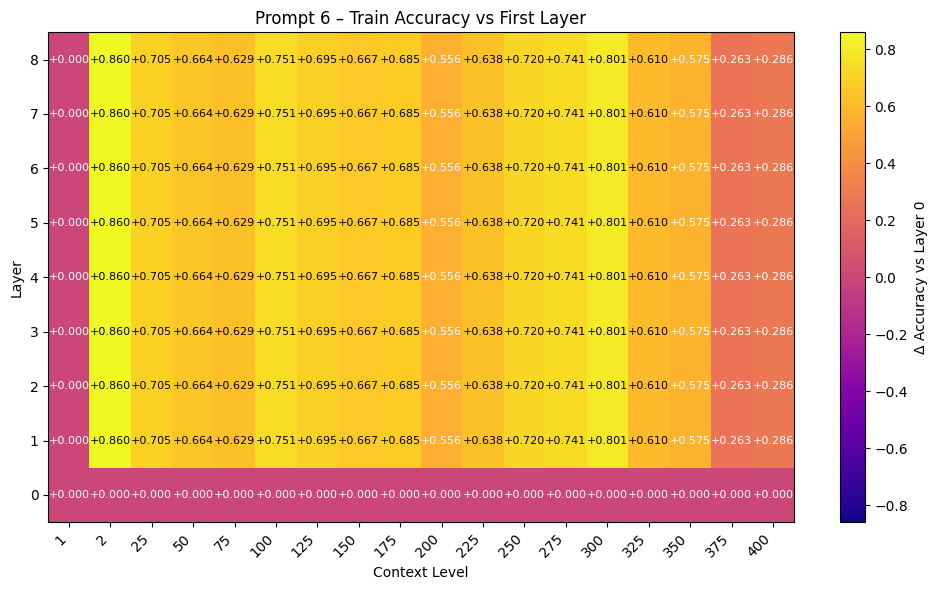

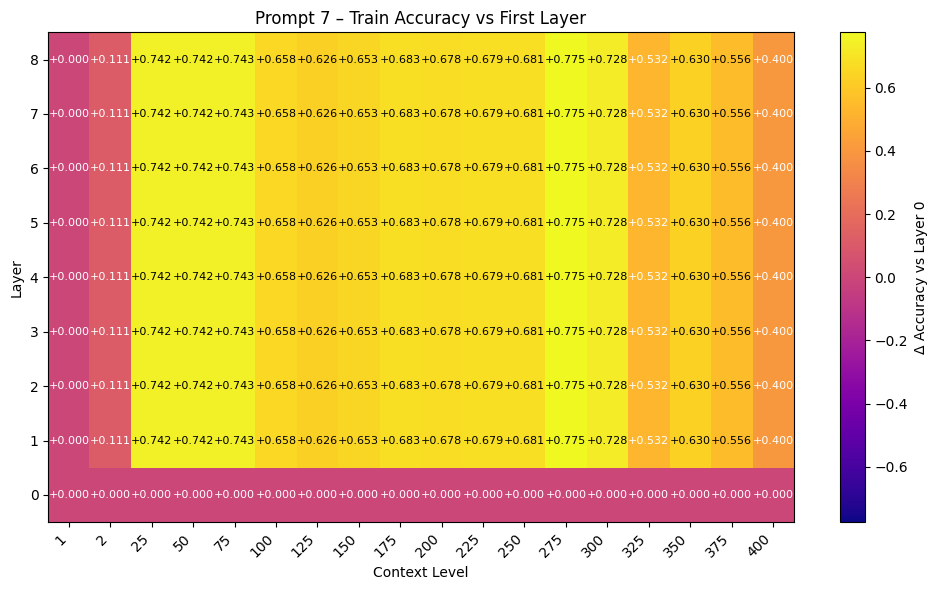

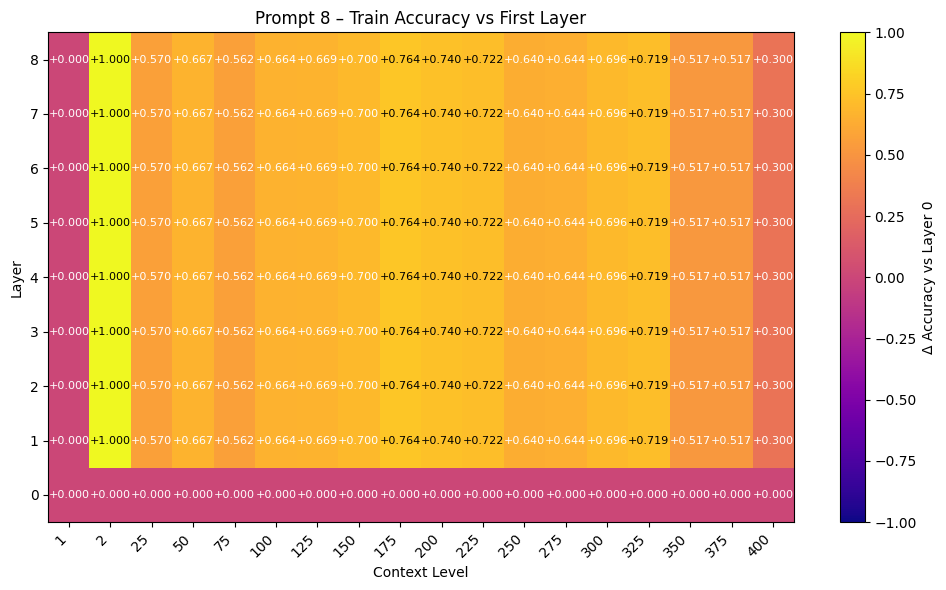

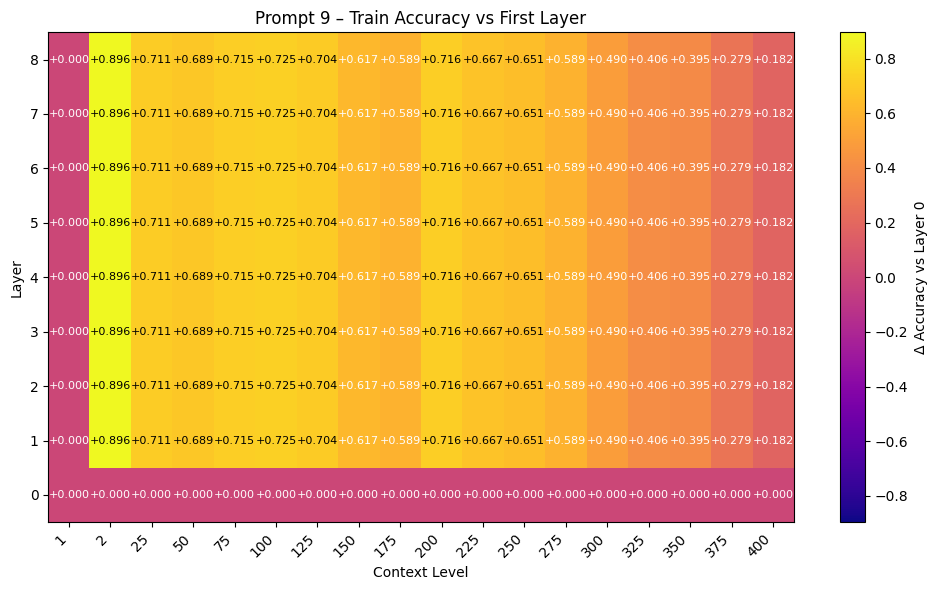

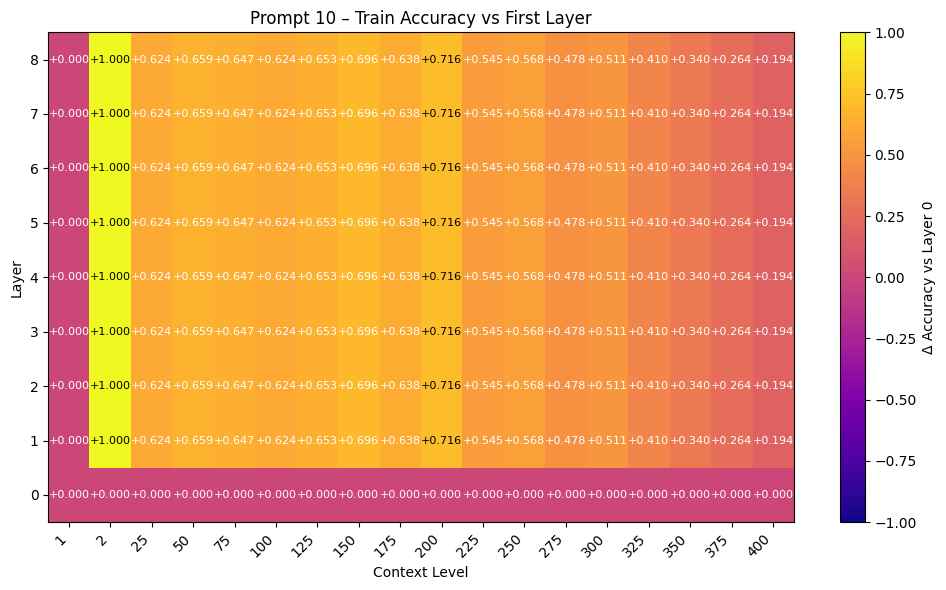

In [7]:
train_prompt_cols = [
    c for c in df.columns
    if c.startswith("Prompt") and c.endswith("_Train_Accuracy")
]

for col in train_prompt_cols:
    prompt_id = col.split("_")[1]

    diff = diff_vs_first_layer(df, col)

    plot_diff_heatmap(
        diff,
        f"Prompt {prompt_id} – Train Accuracy vs First Layer (Cumulative Accuracy)"
    )


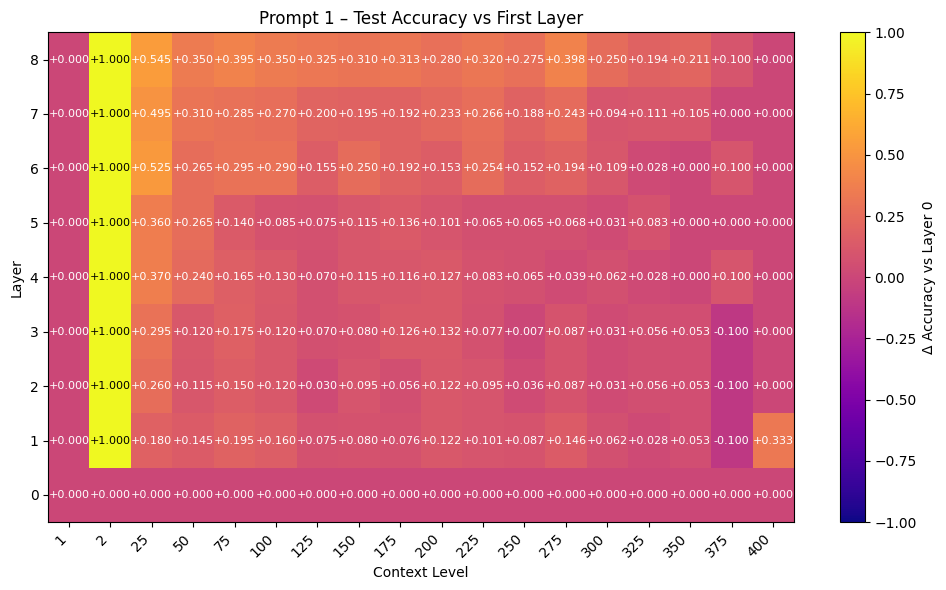

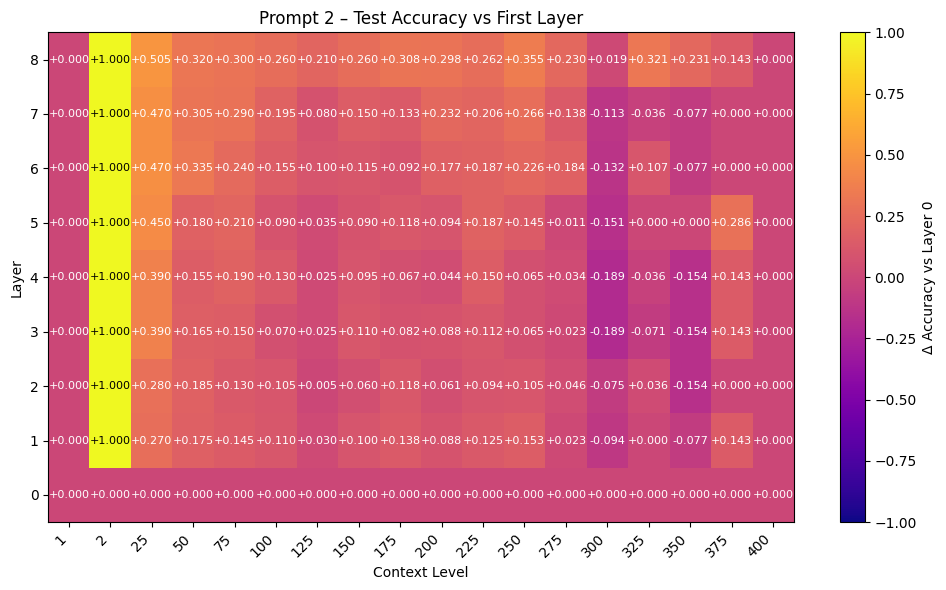

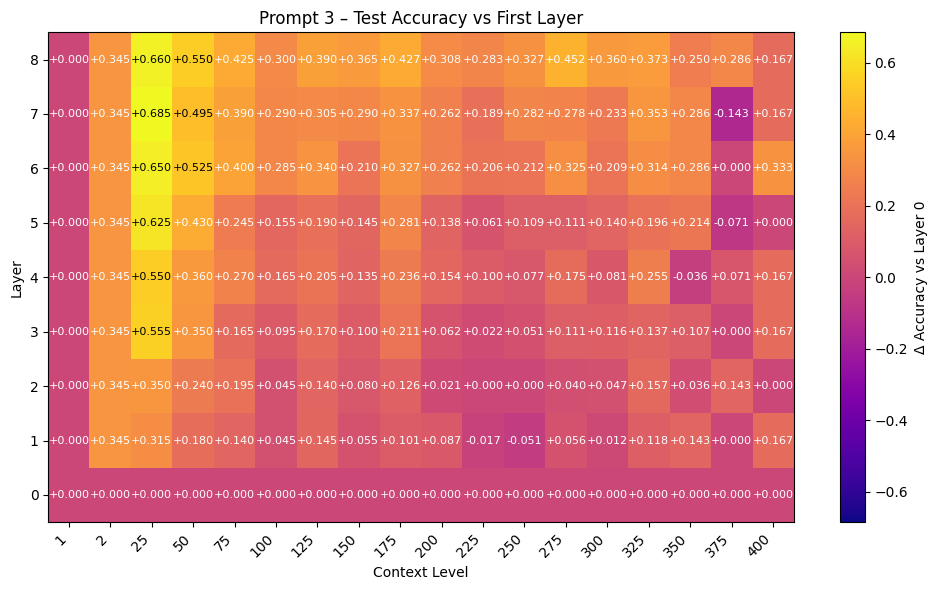

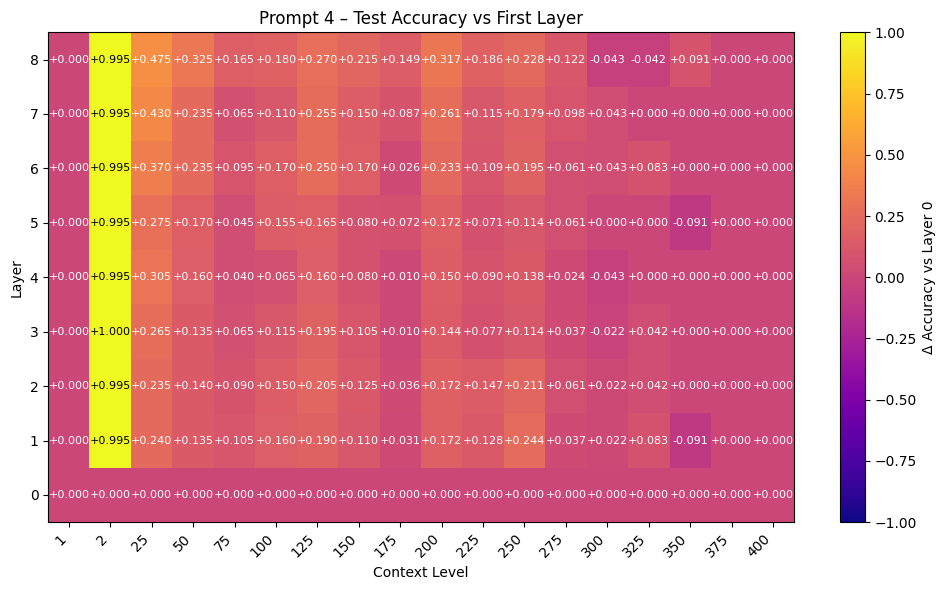

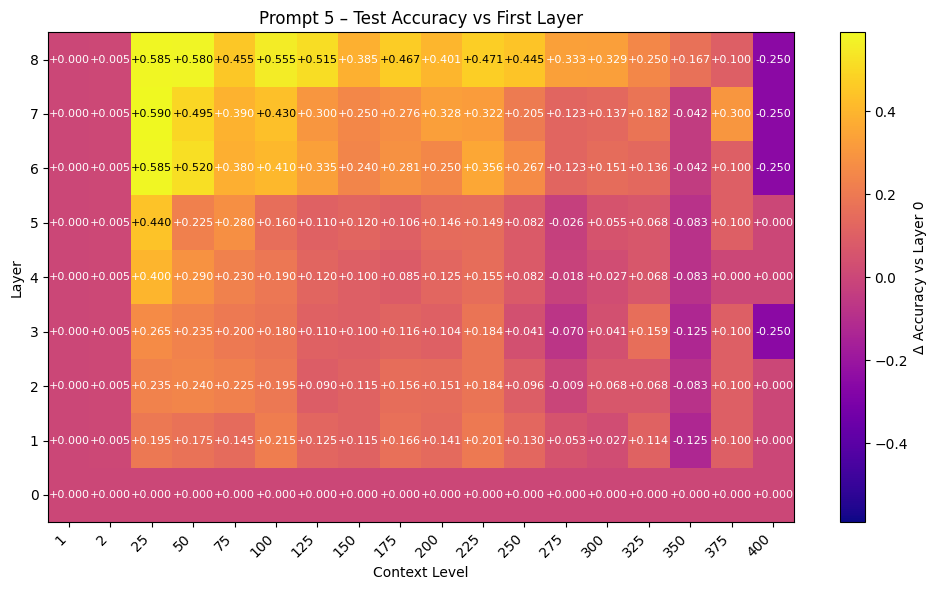

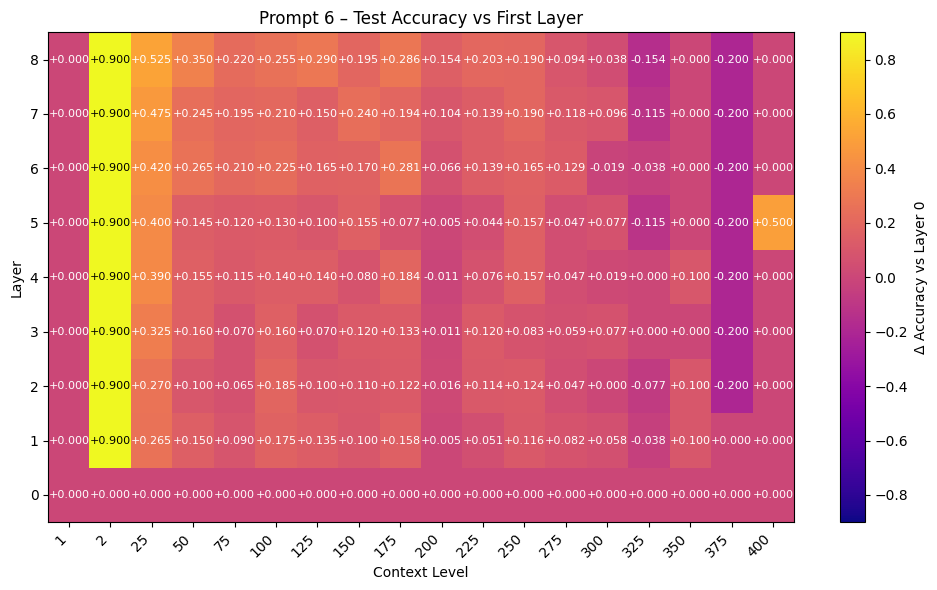

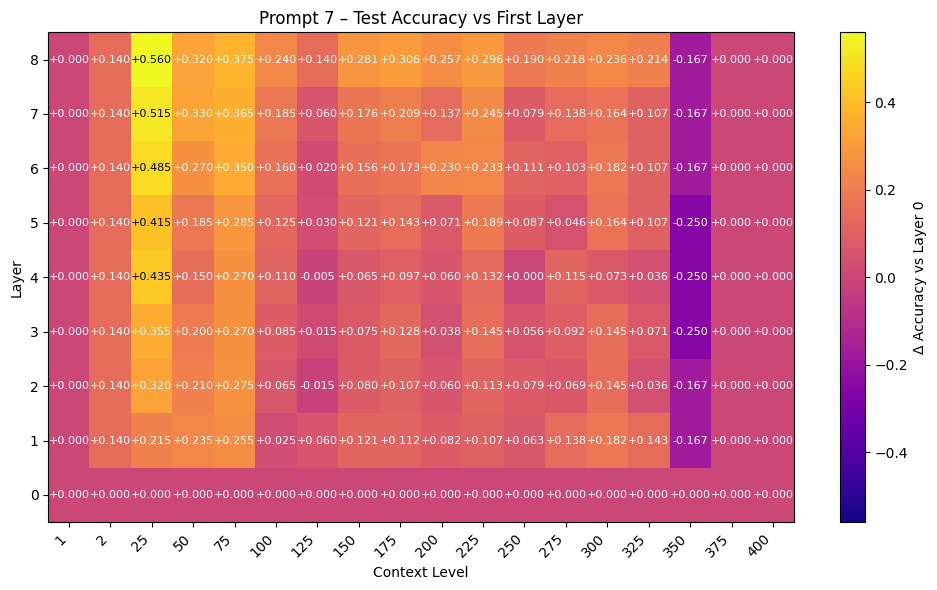

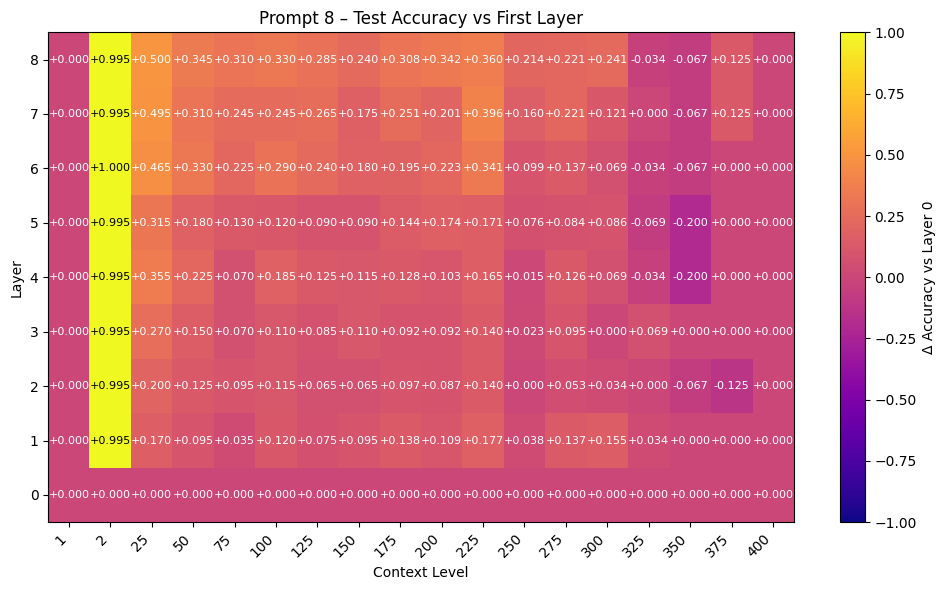

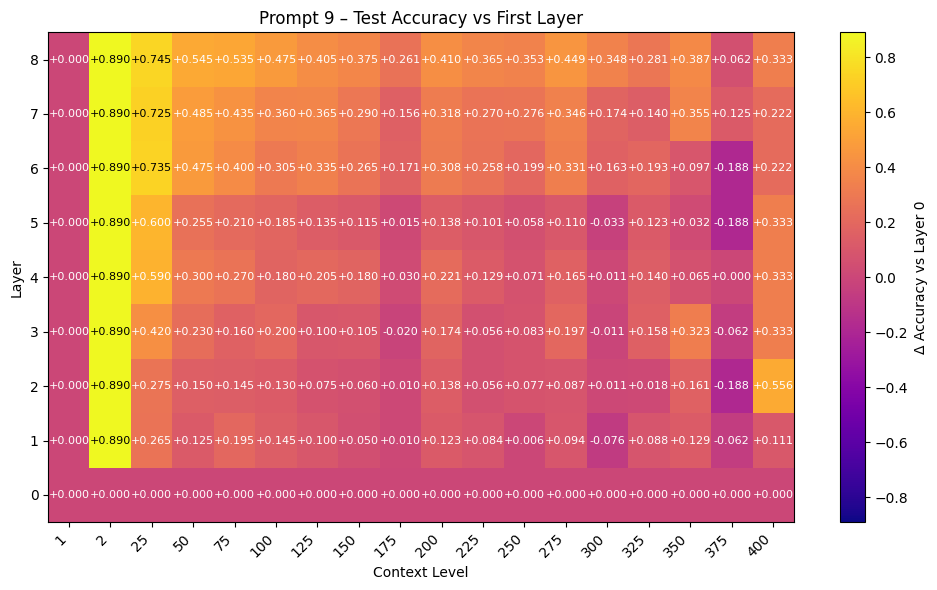

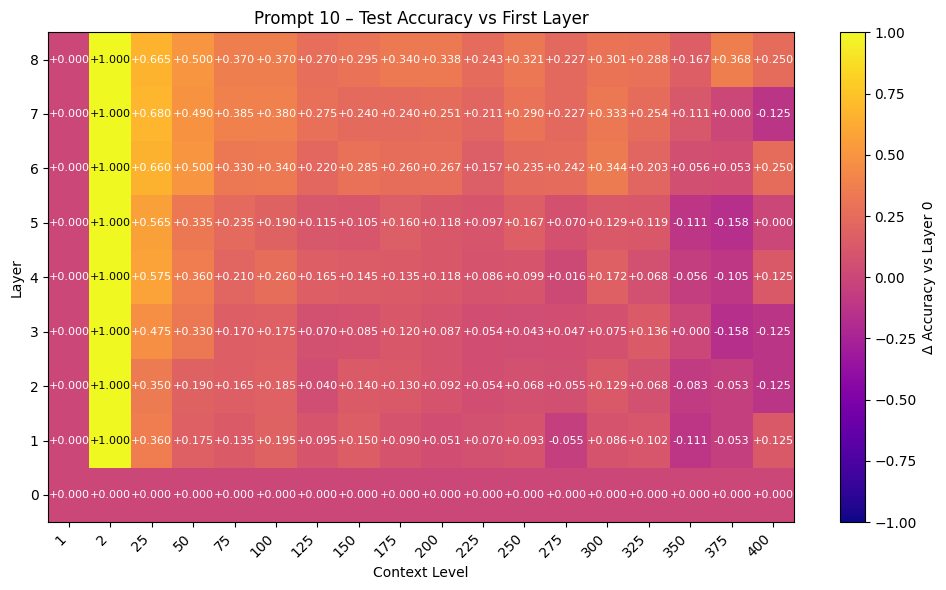

In [8]:
test_prompt_cols = [
    c for c in df.columns
    if c.startswith("Prompt") and c.endswith("_Test_Accuracy")
]

for col in test_prompt_cols:
    prompt_id = col.split("_")[1]

    diff = diff_vs_first_layer(df, col)

    plot_diff_heatmap(
        diff,
        f"Prompt {prompt_id} – Test Accuracy vs First Layer (Cumulative Accuracy)"
    )


In [9]:
def avg_diff_vs_first_layer(df, value_col):
    pivot = (
        df.pivot(
            index="Layer",
            columns="Context_Level",
            values=value_col
        )
        .sort_index()
    )

    first_layer = pivot.iloc[0]
    diff = pivot.subtract(first_layer, axis=1)

    avg_diff = diff.mean(axis=1)  # average across context levels
    return avg_diff


In [10]:
def plot_avg_layer_heatmap(series, title, fmt="+.2f", cmap="plasma"):
    data = series.to_frame(name="Avg Δ Accuracy")

    vmax = np.nanmax(np.abs(data.values))

    plt.figure(figsize=(4, 8))

    im = plt.imshow(
        data,
        aspect="auto",
        origin="lower",
        cmap=cmap,
        vmin=-vmax,
        vmax=vmax
    )

    plt.colorbar(im, label="Avg Δ Accuracy vs Layer 0")

    plt.xticks([0], ["Avg"])
    plt.yticks(
        np.arange(len(data.index)),
        data.index
    )

    # Annotate cells
    for i, val in enumerate(series.values):
        if not pd.isna(val):
            plt.text(
                0, i,
                format(val, fmt),
                ha="center",
                va="center",
                fontsize=9,
                color="white" if val < data.values.max() * 0.7 else "black"
            )

    plt.ylabel("Layer")
    plt.title(title)
    plt.tight_layout()
    plt.show()


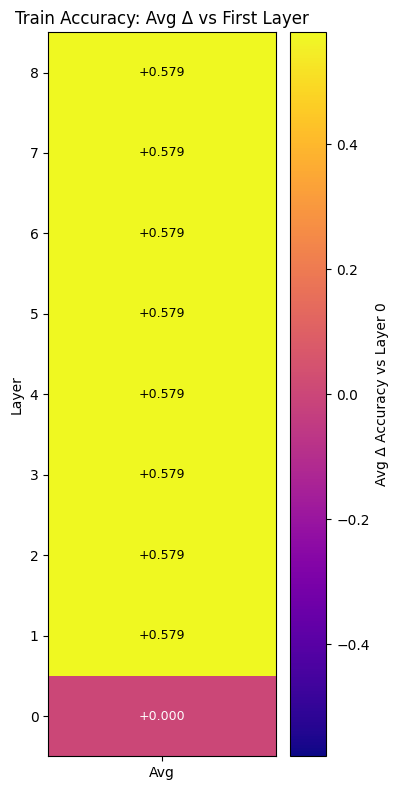

In [11]:
train_avg = avg_diff_vs_first_layer(df, "Train_Accuracy")

plot_avg_layer_heatmap(
    train_avg,
    "Train Accuracy: Avg Δ vs First Layer (Cumulative Accuracy)"
)


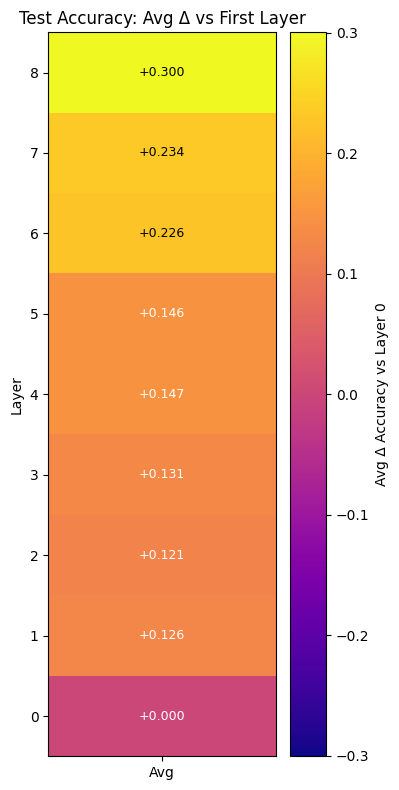

In [12]:
test_avg = avg_diff_vs_first_layer(df, "Test_Accuracy")

plot_avg_layer_heatmap(
    test_avg,
    "Test Accuracy: Avg Δ vs First Layer"
)


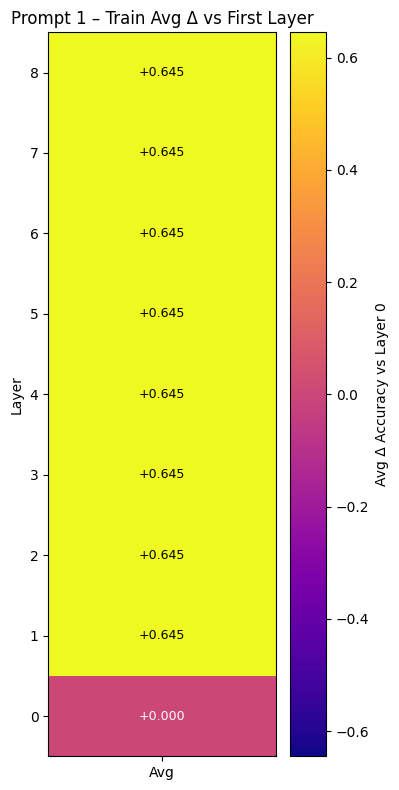

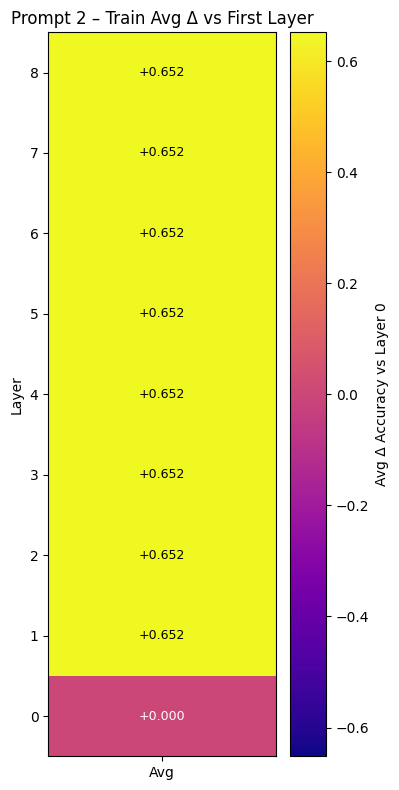

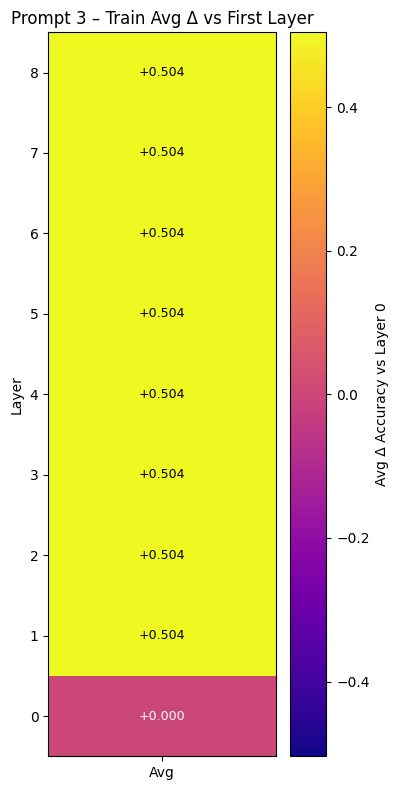

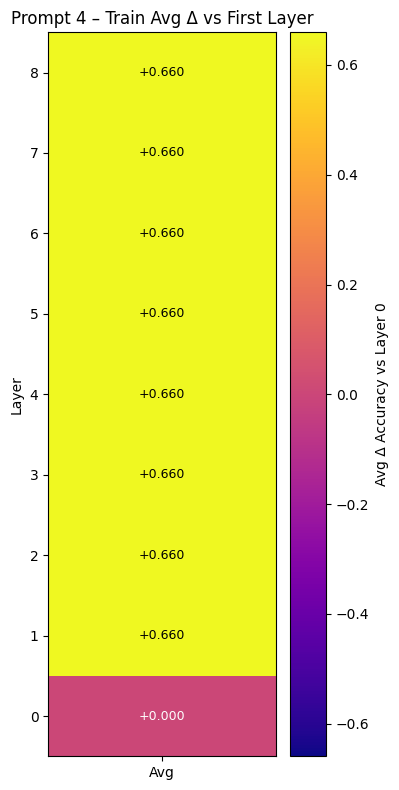

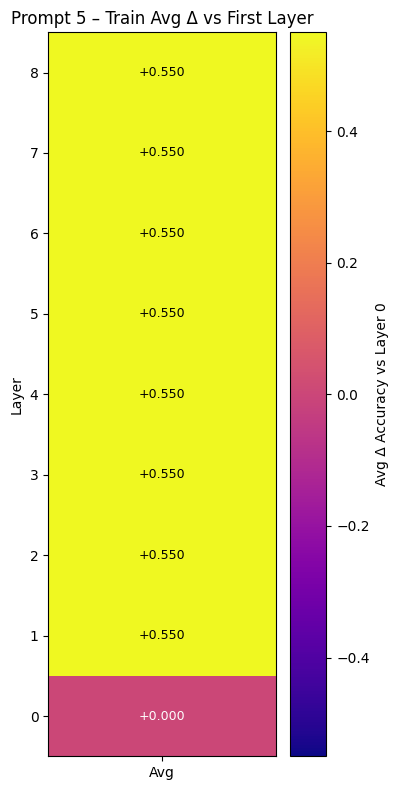

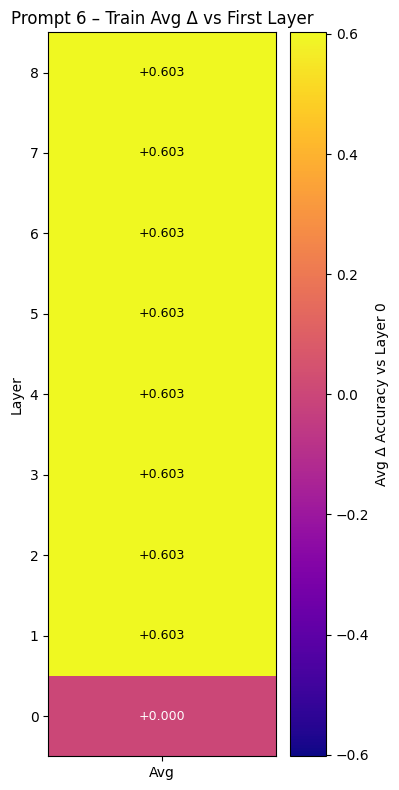

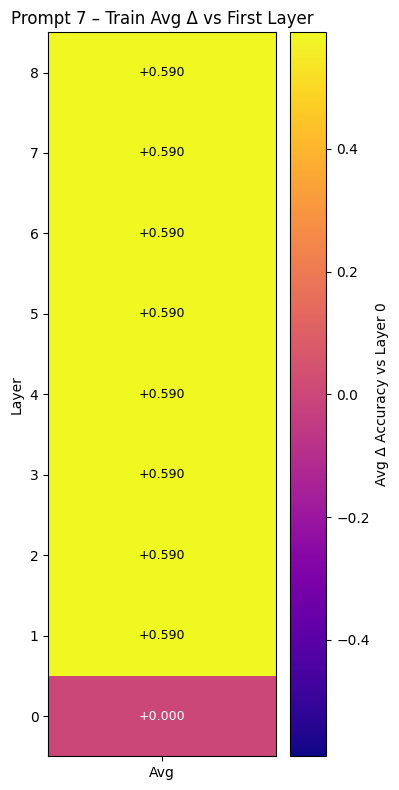

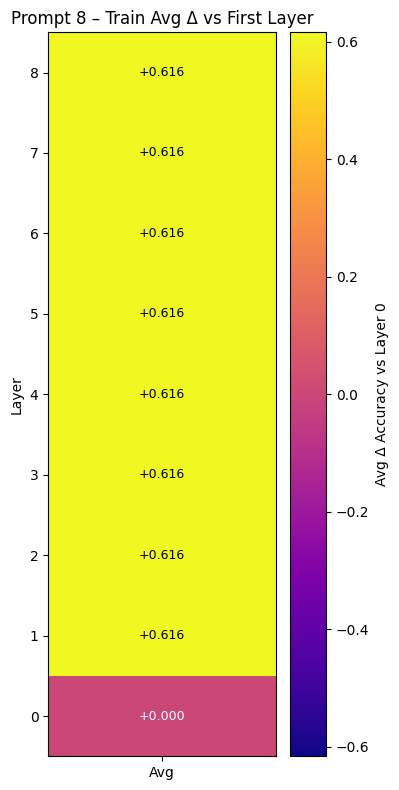

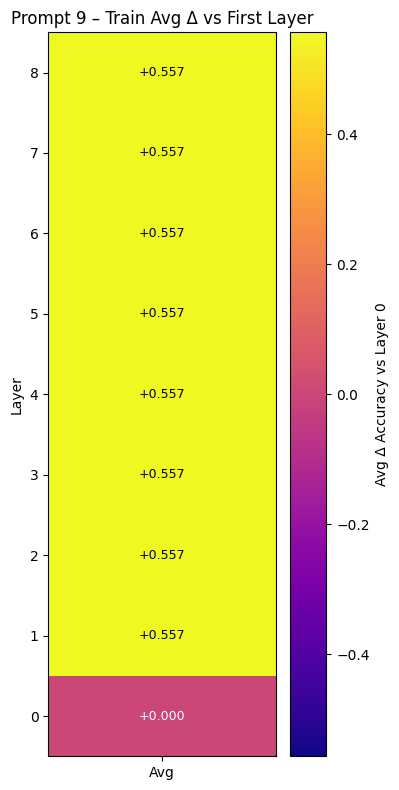

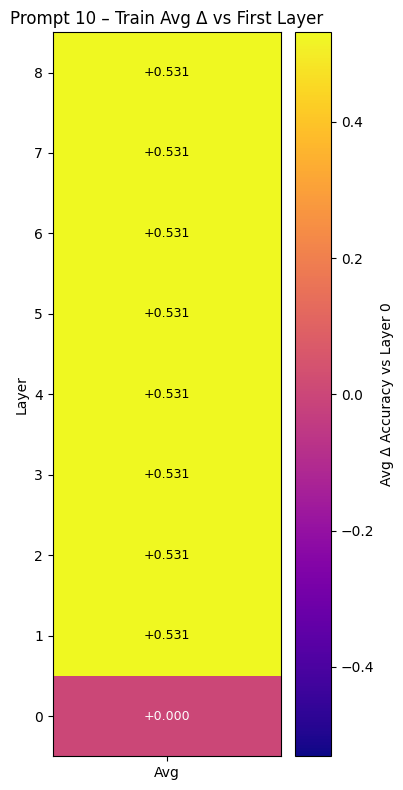

In [13]:
train_prompt_cols = [
    c for c in df.columns
    if c.startswith("Prompt") and c.endswith("_Train_Accuracy")
]

for col in train_prompt_cols:
    prompt_id = col.split("_")[1]

    avg = avg_diff_vs_first_layer(df, col)

    plot_avg_layer_heatmap(
        avg,
        f"Prompt {prompt_id} – Train Avg Δ vs First Layer"
    )


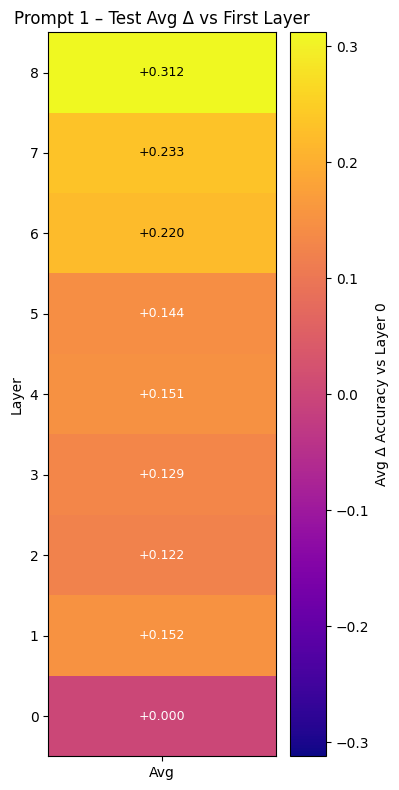

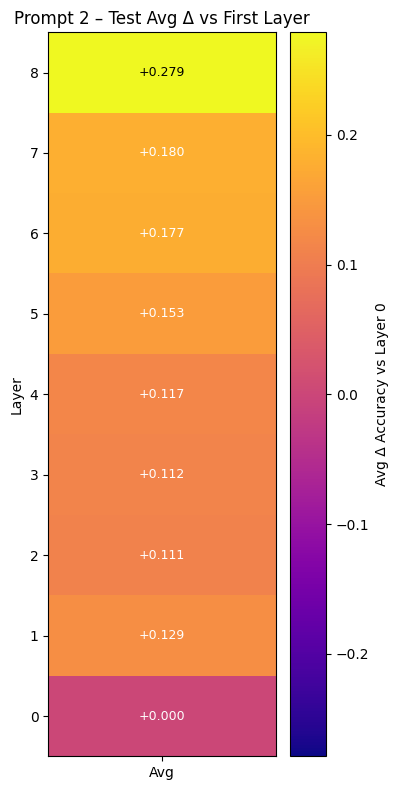

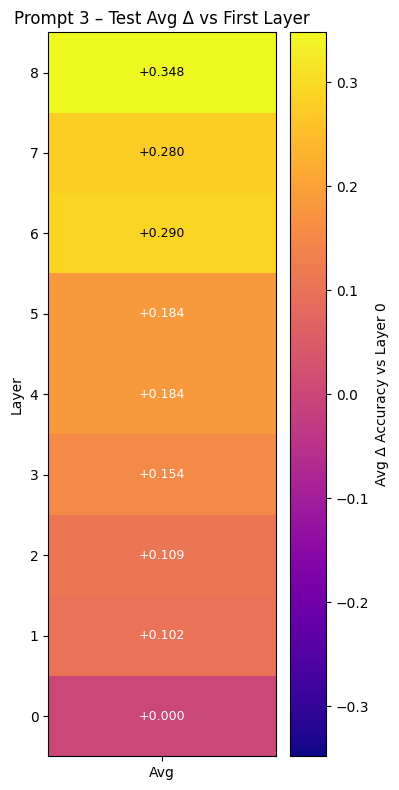

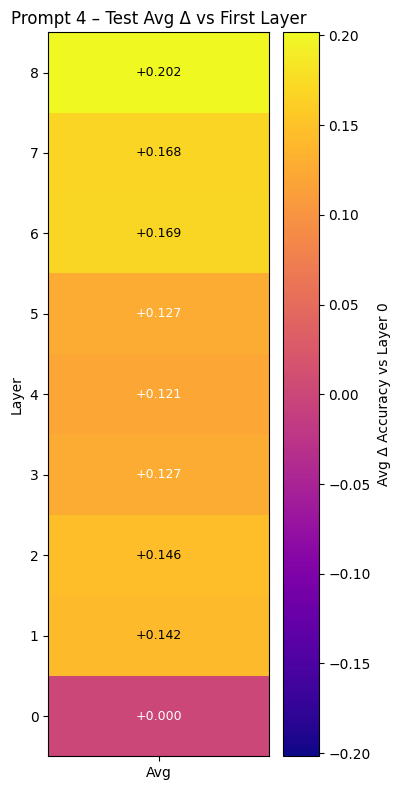

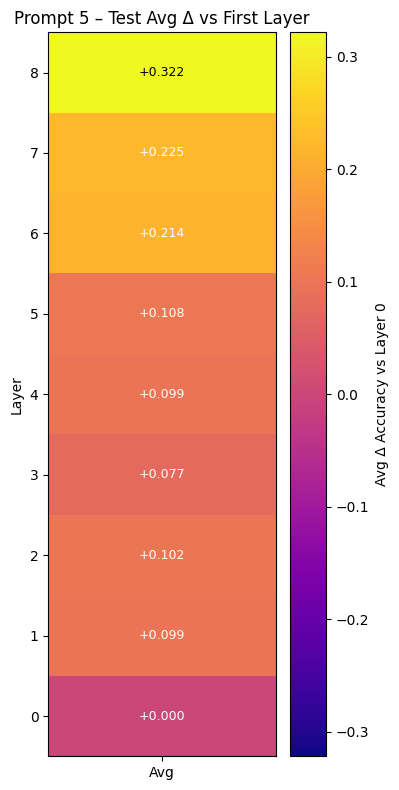

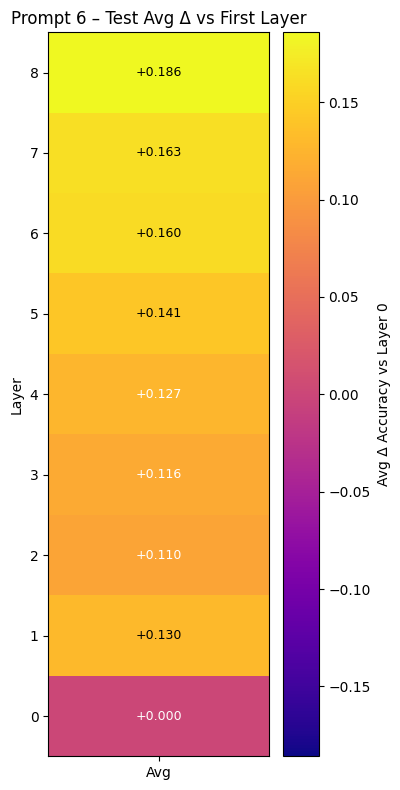

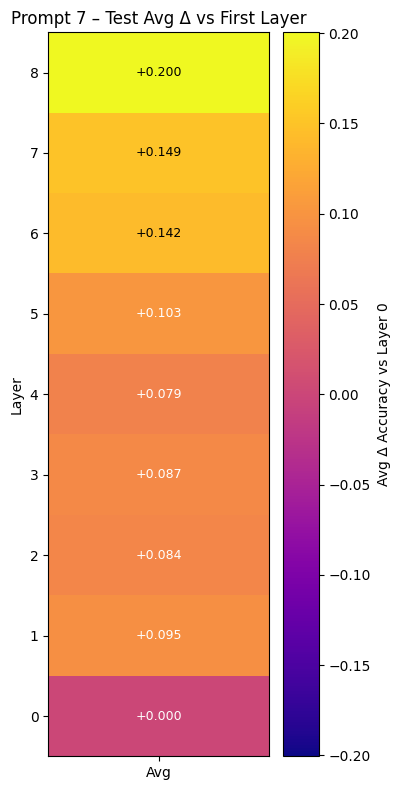

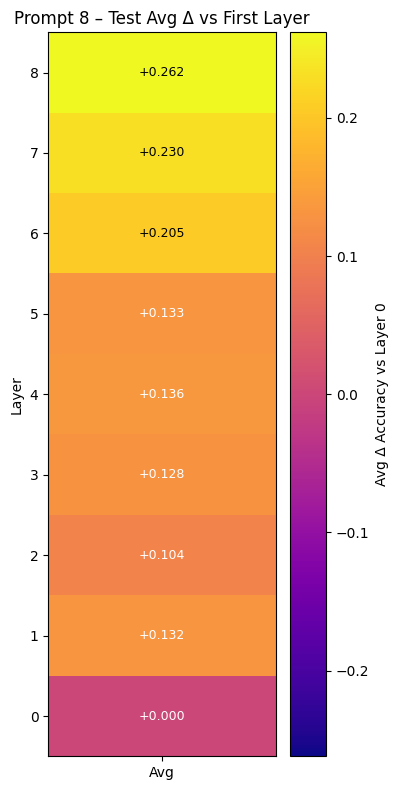

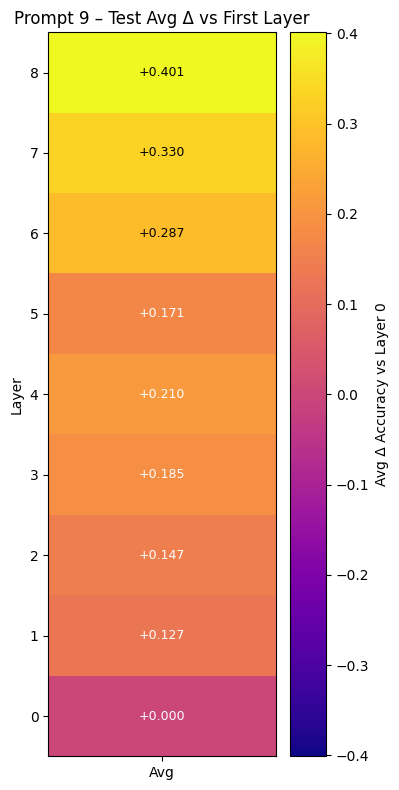

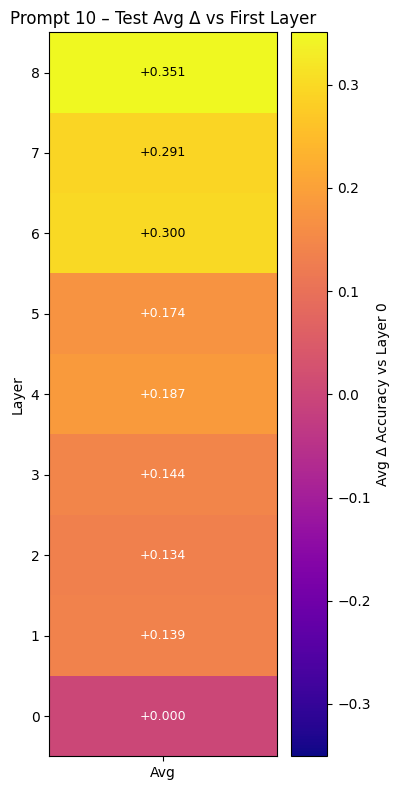

In [14]:
test_prompt_cols = [
    c for c in df.columns
    if c.startswith("Prompt") and c.endswith("_Test_Accuracy")
]

for col in test_prompt_cols:
    prompt_id = col.split("_")[1]

    avg = avg_diff_vs_first_layer(df, col)

    plot_avg_layer_heatmap(
        avg,
        f"Prompt {prompt_id} – Test Avg Δ vs First Layer"
    )


In [15]:
def avg_diff_vs_first_layer(df, value_col):
    pivot = (
        df.pivot(
            index="Layer",
            columns="Context_Level",
            values=value_col
        )
        .sort_index()
    )

    first_layer = pivot.iloc[0]
    diff = pivot.subtract(first_layer, axis=1)

    return diff.mean(axis=1)


In [16]:
def plot_avg_diff_bar(series, title, ylabel="Avg Δ Accuracy vs Layer 0"):
    layers = series.index
    values = series.values

    plt.figure(figsize=(10, 5))

    bars = plt.bar(layers, values)

    plt.axhline(0, linewidth=1)
    plt.xlabel("Layer")
    plt.ylabel(ylabel)
    plt.title(title)

    # Annotate bars
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{height:+.3f}",
            ha="center",
            va="bottom" if height >= 0 else "top",
            fontsize=9
        )

    plt.tight_layout()
    plt.show()


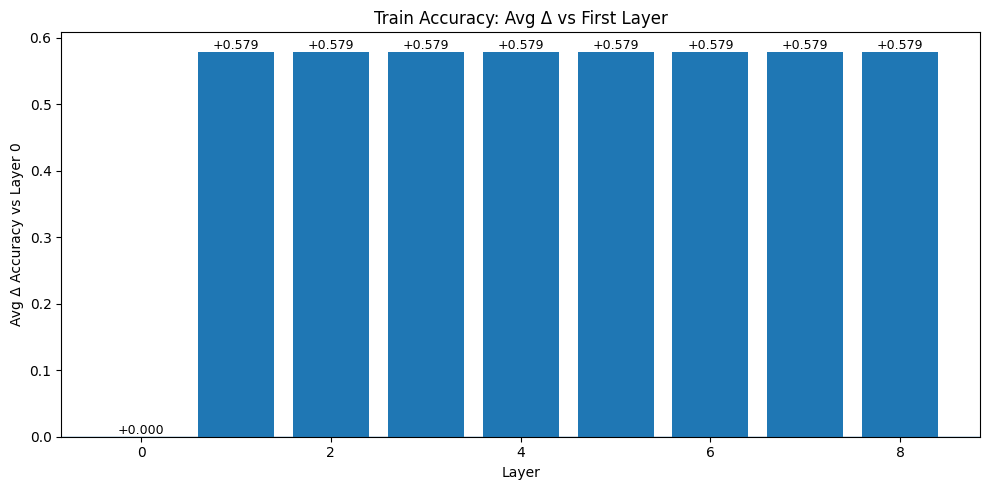

In [17]:
train_avg = avg_diff_vs_first_layer(df, "Train_Accuracy")

plot_avg_diff_bar(
    train_avg,
    "Train Accuracy: Avg Δ vs First Layer"
)


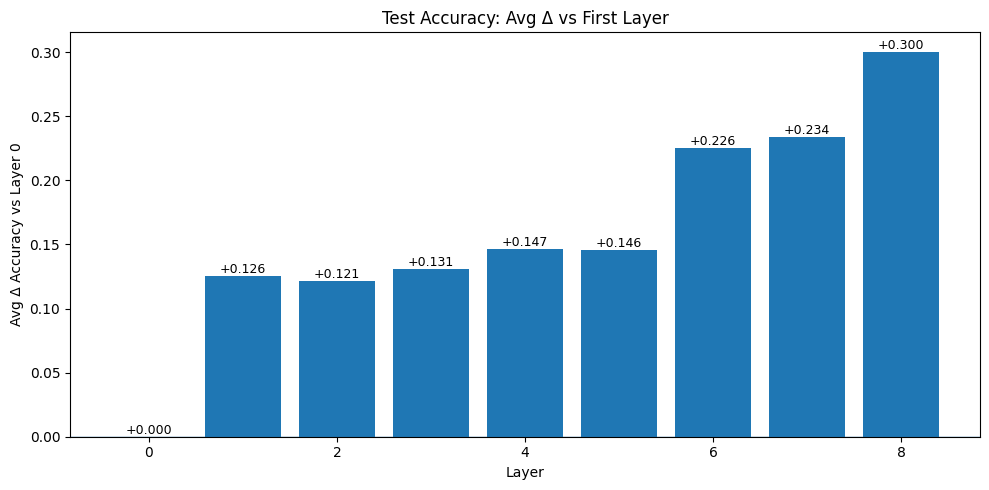

In [18]:
test_avg = avg_diff_vs_first_layer(df, "Test_Accuracy")

plot_avg_diff_bar(
    test_avg,
    "Test Accuracy: Avg Δ vs First Layer"
)


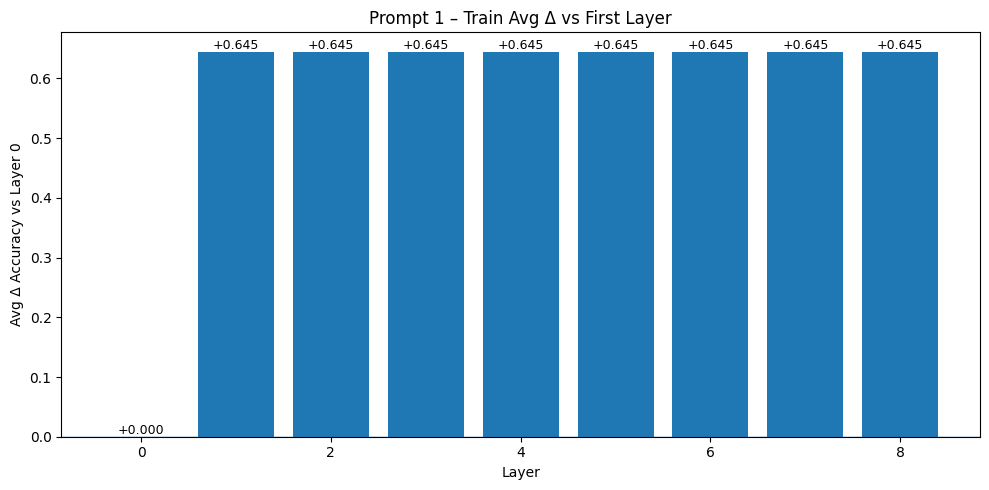

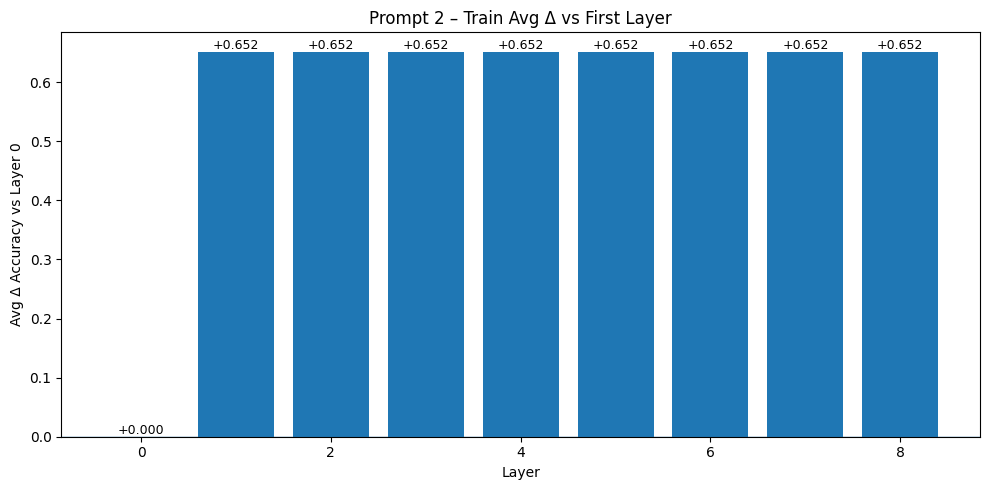

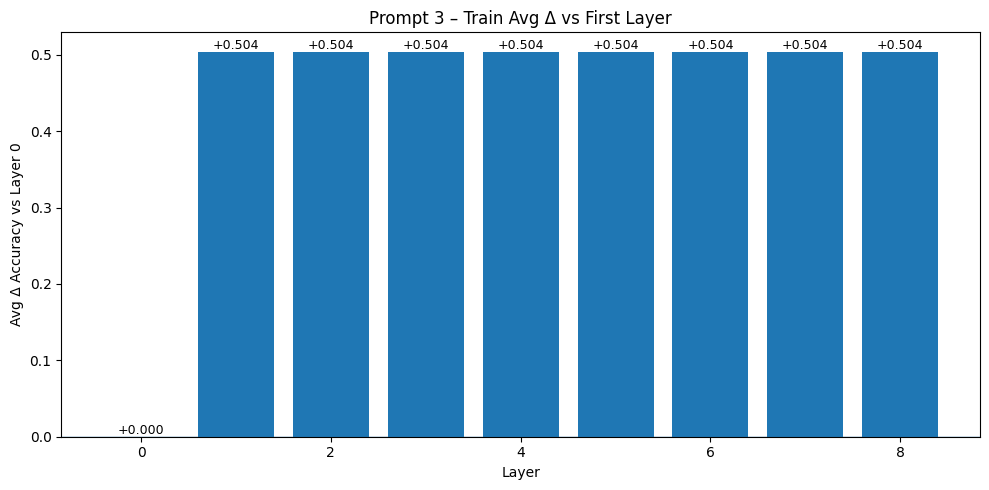

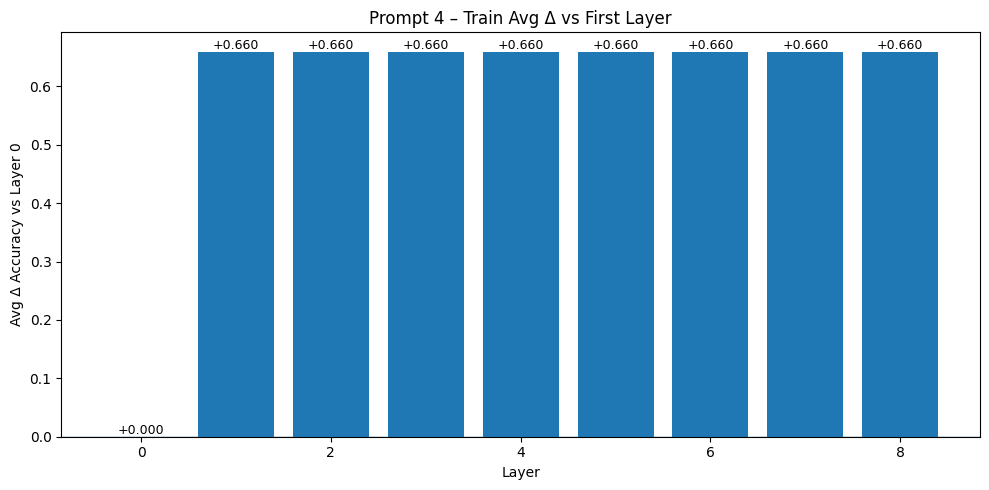

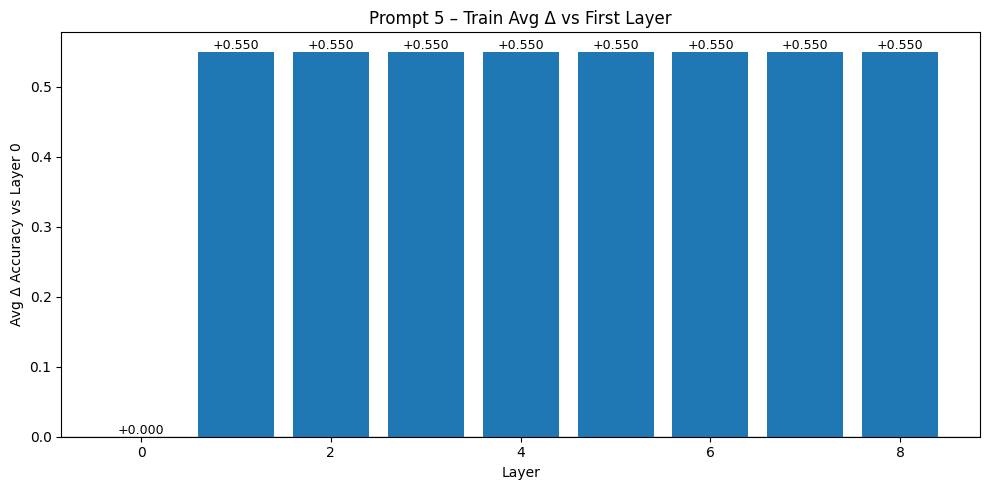

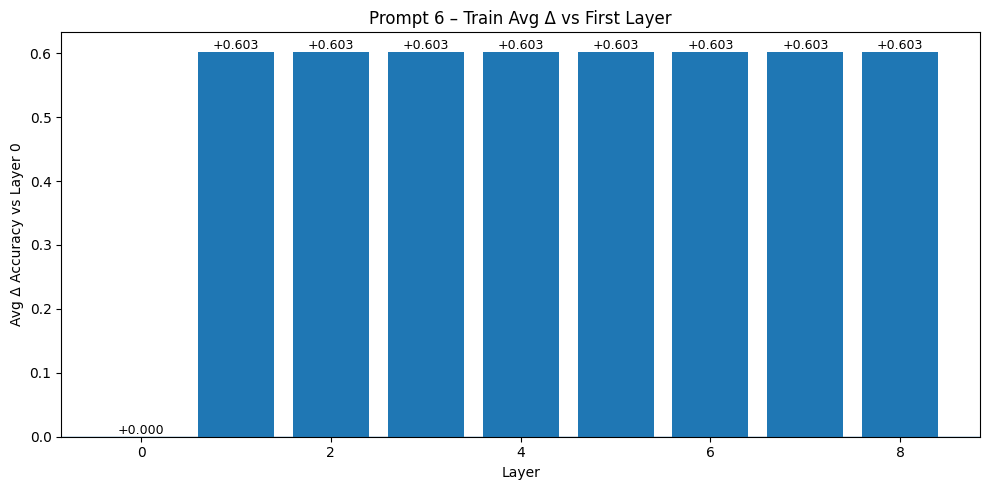

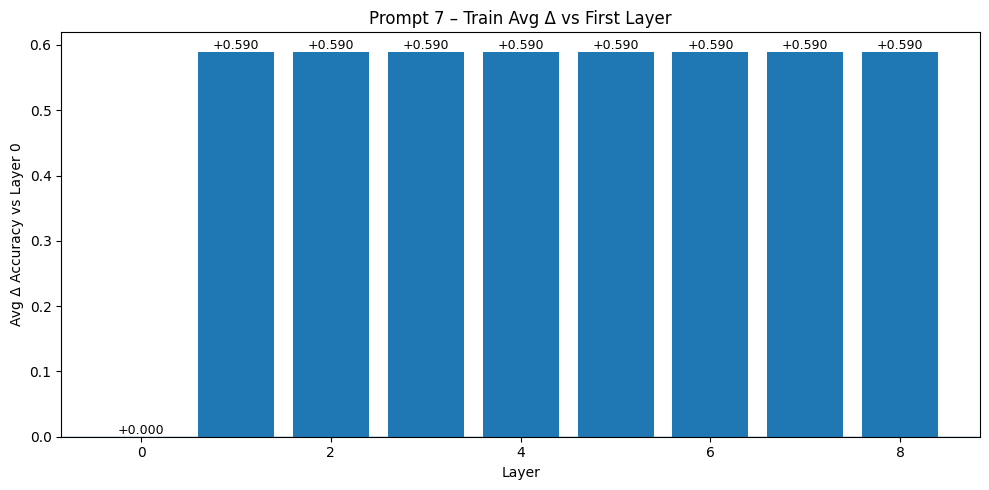

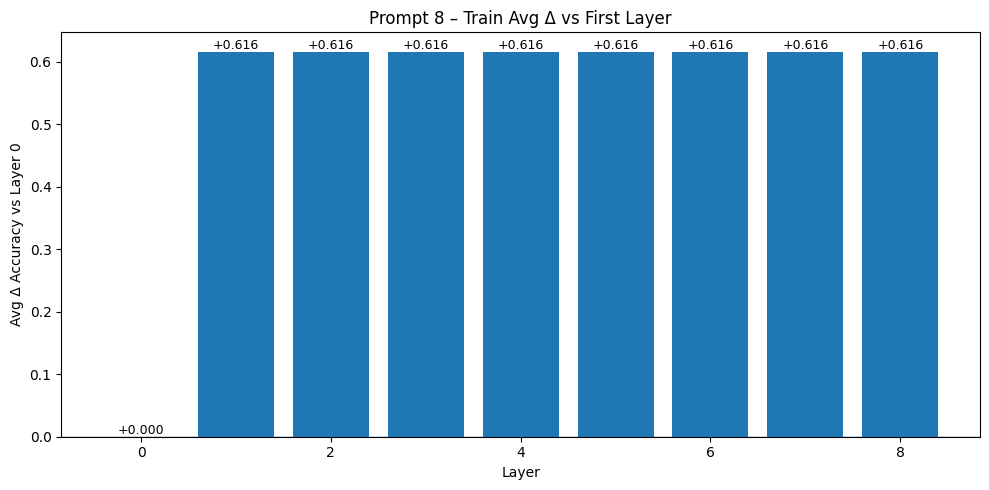

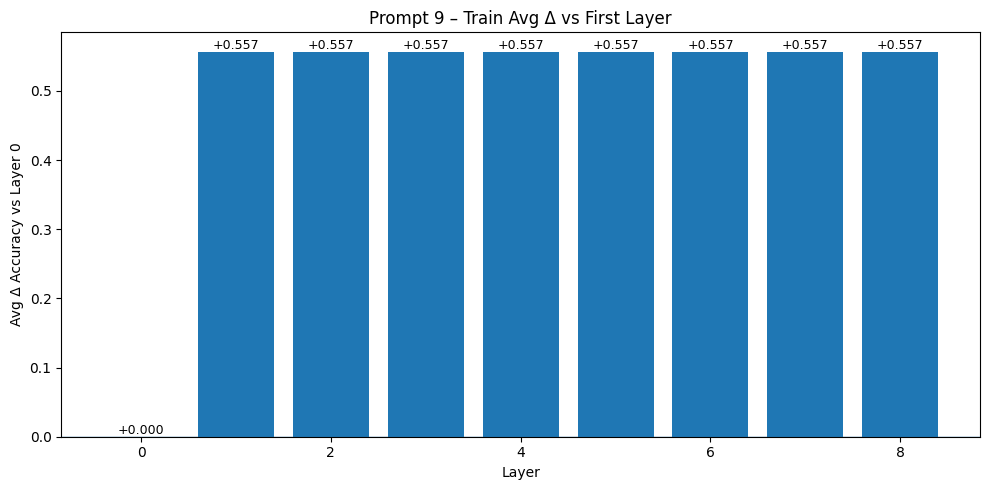

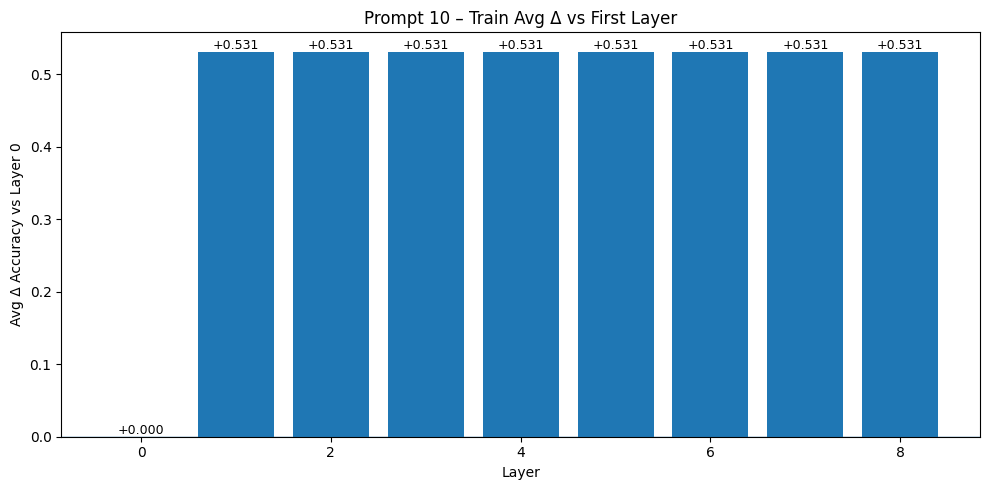

In [19]:
train_prompt_cols = [
    c for c in df.columns
    if c.startswith("Prompt") and c.endswith("_Train_Accuracy")
]

for col in train_prompt_cols:
    prompt_id = col.split("_")[1]

    avg = avg_diff_vs_first_layer(df, col)

    plot_avg_diff_bar(
        avg,
        f"Prompt {prompt_id} – Train Avg Δ vs First Layer"
    )


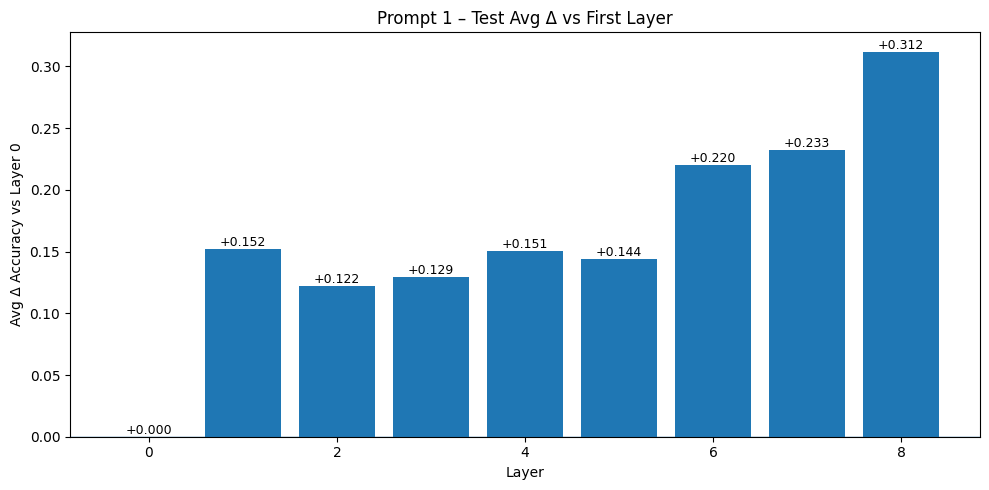

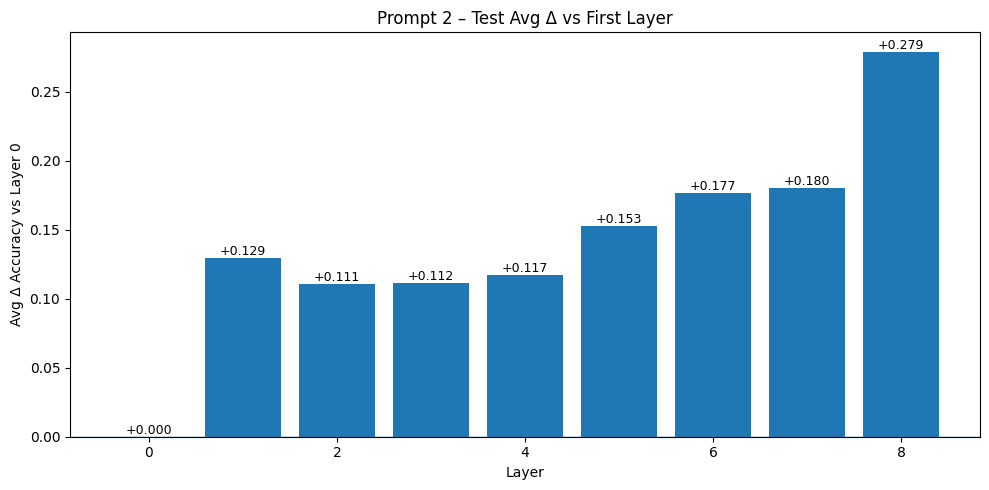

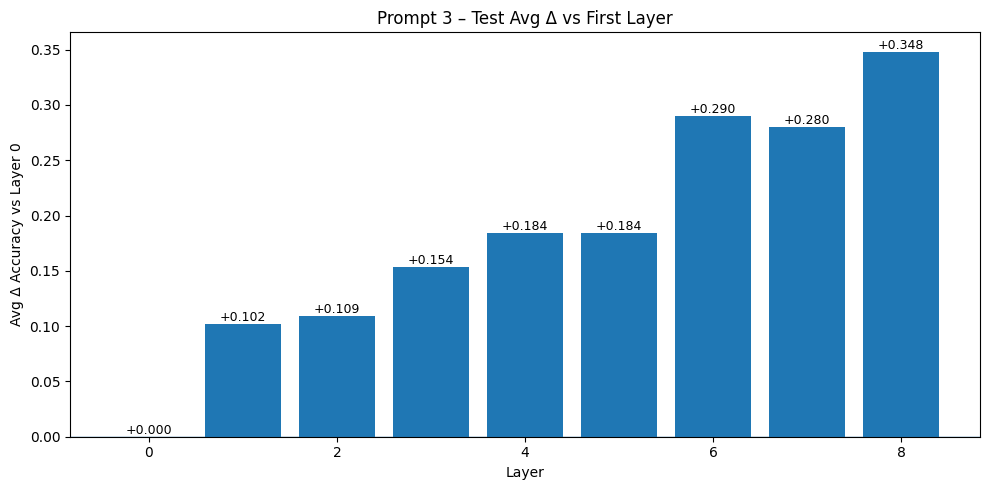

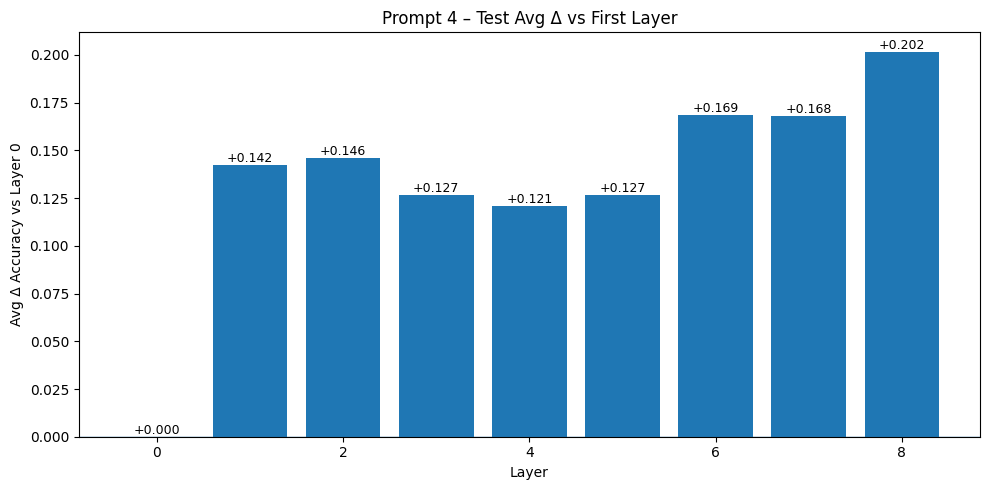

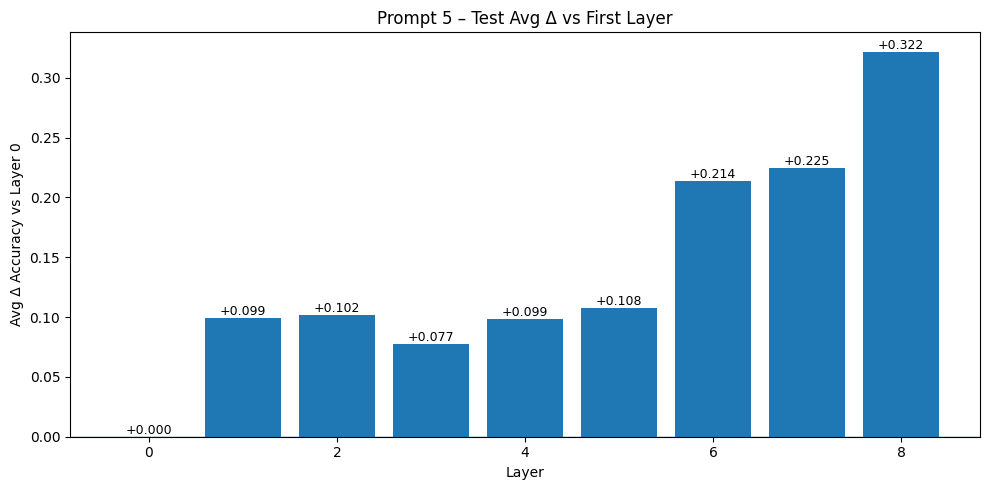

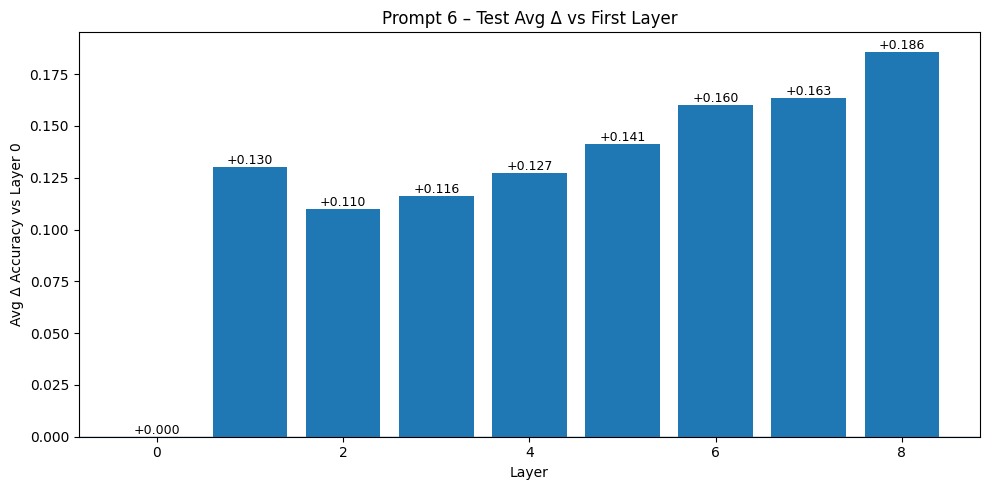

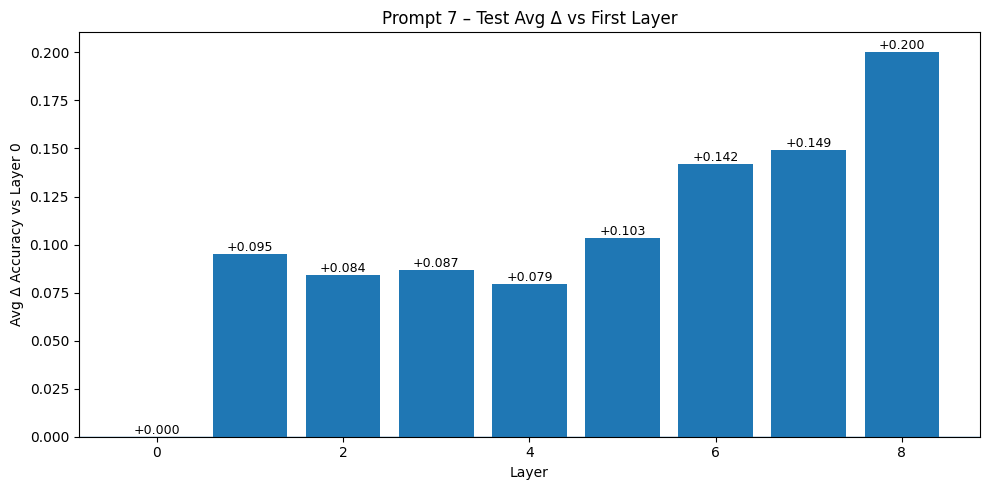

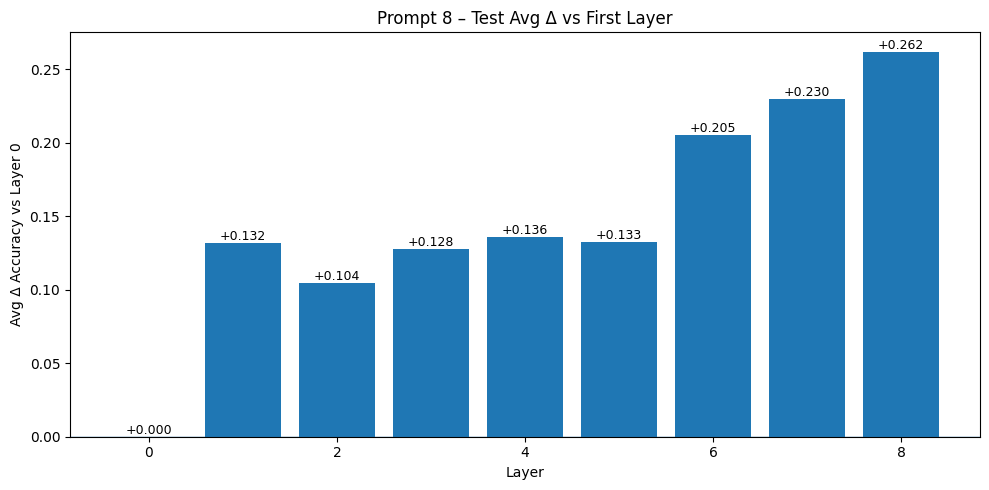

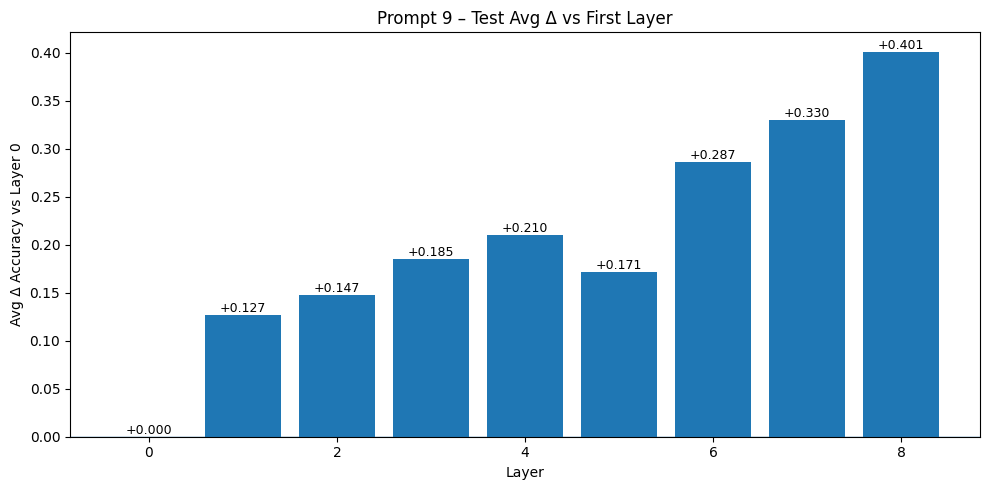

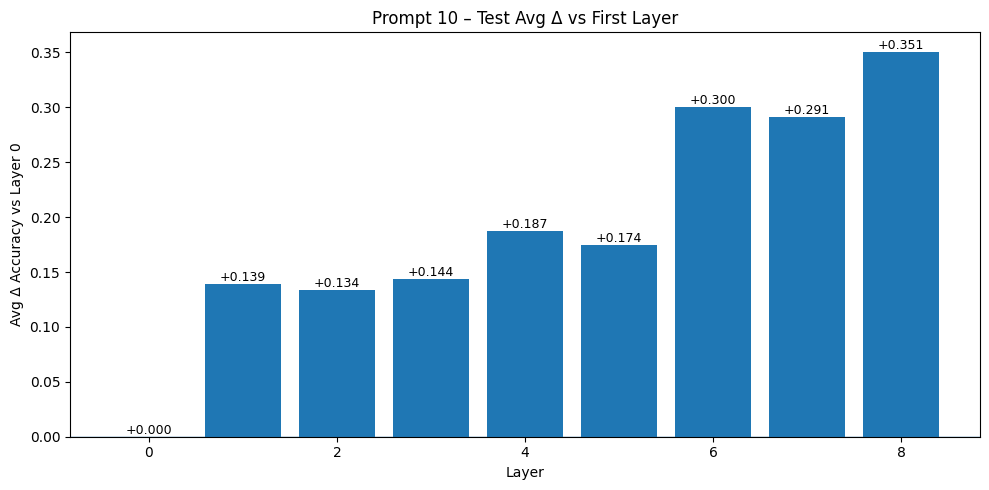

In [20]:
test_prompt_cols = [
    c for c in df.columns
    if c.startswith("Prompt") and c.endswith("_Test_Accuracy")
]

for col in test_prompt_cols:
    prompt_id = col.split("_")[1]

    avg = avg_diff_vs_first_layer(df, col)

    plot_avg_diff_bar(
        avg,
        f"Prompt {prompt_id} – Test Avg Δ vs First Layer"
    )


In [21]:
def avg_accuracy_per_layer(df, value_col):
    """
    Returns Series indexed by Layer:
    average accuracy across Context_Level
    """
    pivot = df.pivot(
        index="Layer",
        columns="Context_Level",
        values=value_col
    ).sort_index()

    return pivot.mean(axis=1)


In [22]:
def cumulative_vs_layer0(avg_acc):
    """
    avg_acc: Series indexed by Layer
    Returns cumulative Δ vs layer 0
    """
    return avg_acc - avg_acc.loc[avg_acc.index.min()]


In [23]:
def plot_avg_layer_cumulative_bar(avg_diff, title, fmt="+.2f"):
    plt.figure(figsize=(8, 5))

    plt.bar(avg_diff.index, avg_diff.values)
    plt.axhline(0, color="black", linewidth=1)

    for x, y in zip(avg_diff.index, avg_diff.values):
        plt.text(
            x, y,
            format(y, fmt),
            ha="center",
            va="bottom" if y >= 0 else "top",
            fontsize=8
        )

    plt.xlabel("Layer")
    plt.ylabel("Avg Δ Accuracy (vs Layer 0)")
    plt.title(title)
    plt.tight_layout()
    plt.show()


In [29]:
def plot_single_column_cumulative_heatmap(avg_diff, title, fmt="+.2f", cmap="plasma"):
    data = avg_diff.to_frame(name="Avg Δ")

    plt.figure(figsize=(4, 6))

    vmax = np.nanmax(np.abs(data.values))

    im = plt.imshow(
        data,
        aspect="auto",
        origin="lower",
        cmap=cmap,
        vmin=-vmax,
        vmax=vmax
    )

    plt.colorbar(im, label="Avg Δ Accuracy (vs Layer 0)")

    plt.xticks([0], ["Avg Δ"])
    plt.yticks(np.arange(len(data.index)), data.index)

    for i in range(data.shape[0]):
        val = data.iloc[i, 0]
        if not pd.isna(val):
            plt.text(
                0, i,
                format(val, fmt),
                ha="center",
                va="center",
                fontsize=9,
                color="white" if abs(val) < vmax * 0.7 else "black"
            )

    plt.ylabel("Layer")
    plt.title(title)
    plt.tight_layout()
    plt.show()


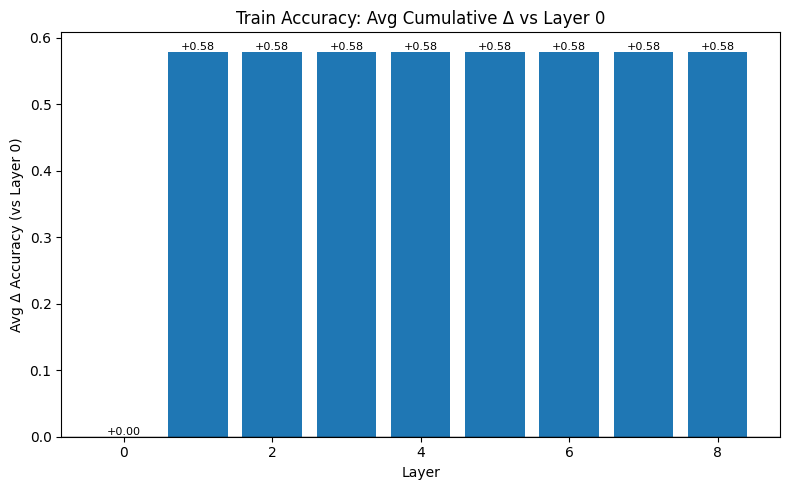

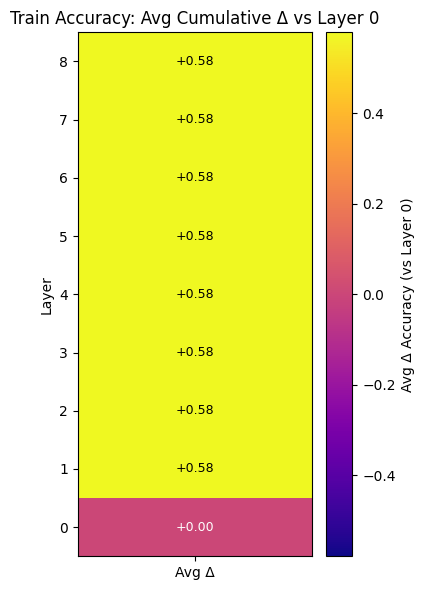

In [30]:
train_avg_acc = avg_accuracy_per_layer(df, "Train_Accuracy")
train_cum = cumulative_vs_layer0(train_avg_acc)

plot_avg_layer_cumulative_bar(
    train_cum,
    "Train Accuracy: Avg Cumulative Δ vs Layer 0"
)

plot_single_column_cumulative_heatmap(
    train_cum,
    "Train Accuracy: Avg Cumulative Δ vs Layer 0"
)


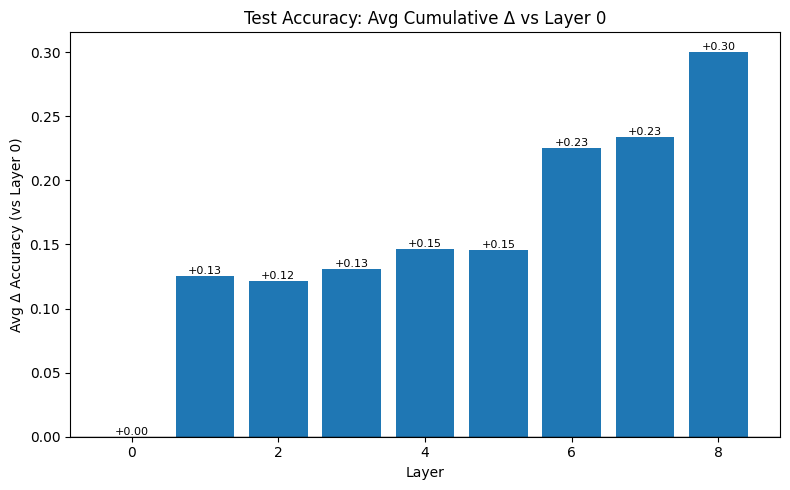

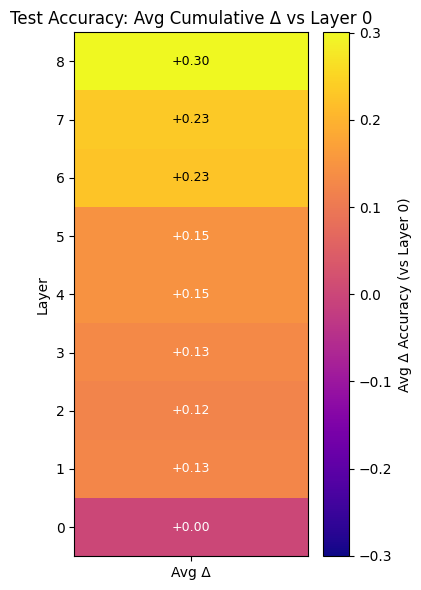

In [31]:
test_avg_acc = avg_accuracy_per_layer(df, "Test_Accuracy")
test_cum = cumulative_vs_layer0(test_avg_acc)

plot_avg_layer_cumulative_bar(
    test_cum,
    "Test Accuracy: Avg Cumulative Δ vs Layer 0"
)

plot_single_column_cumulative_heatmap(
    test_cum,
    "Test Accuracy: Avg Cumulative Δ vs Layer 0"
)


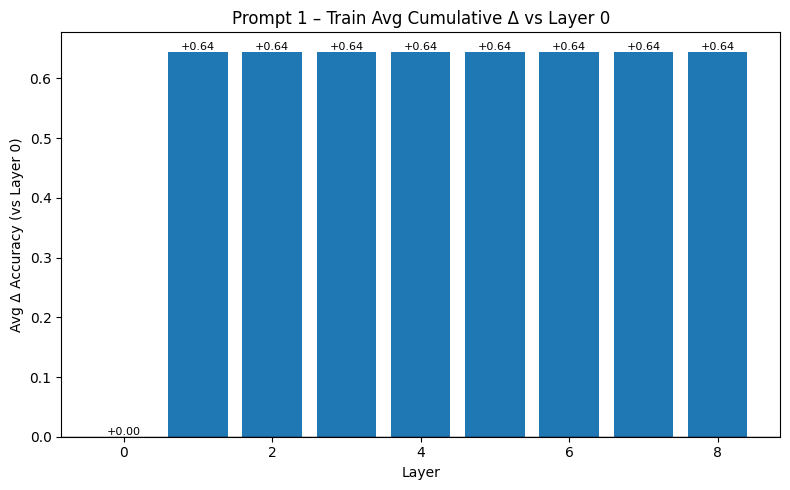

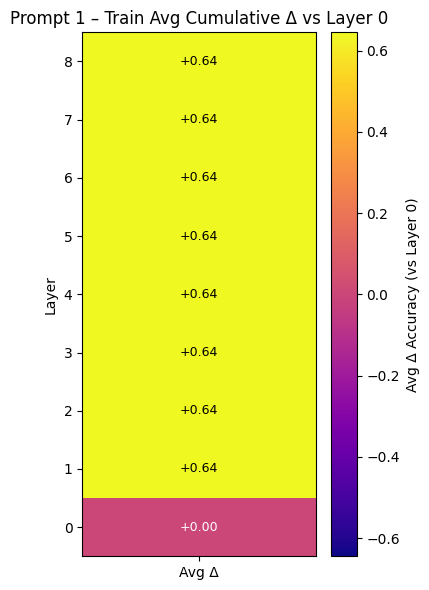

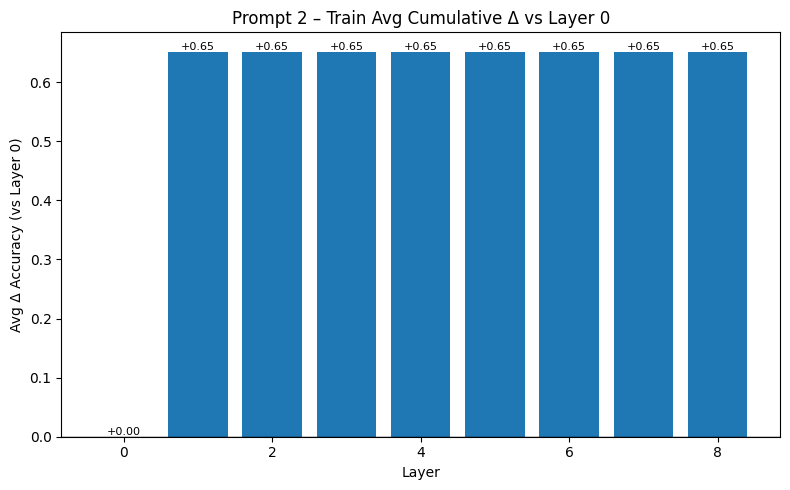

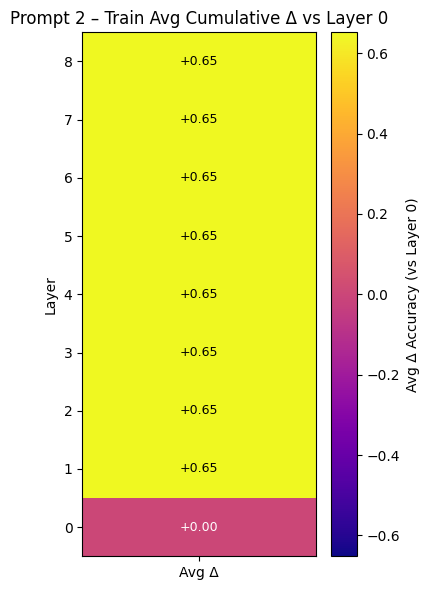

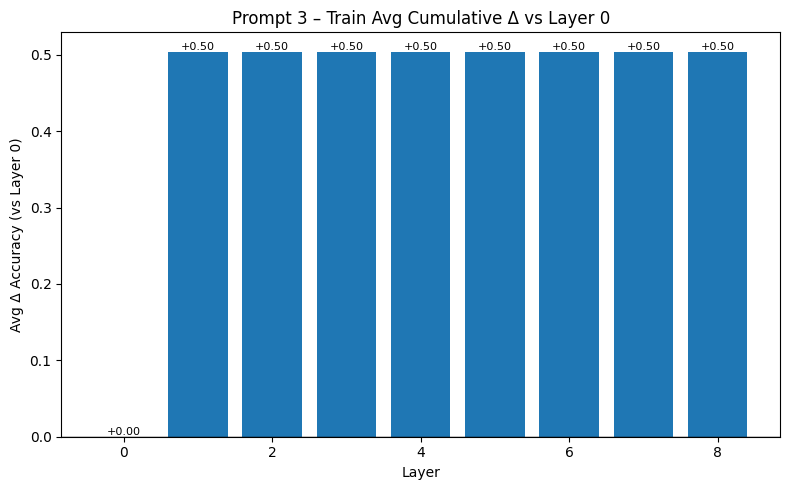

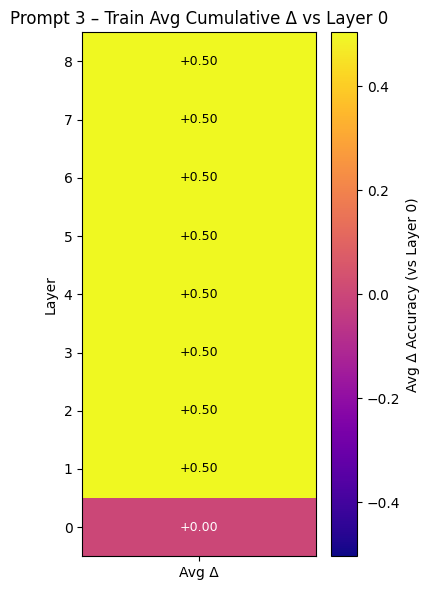

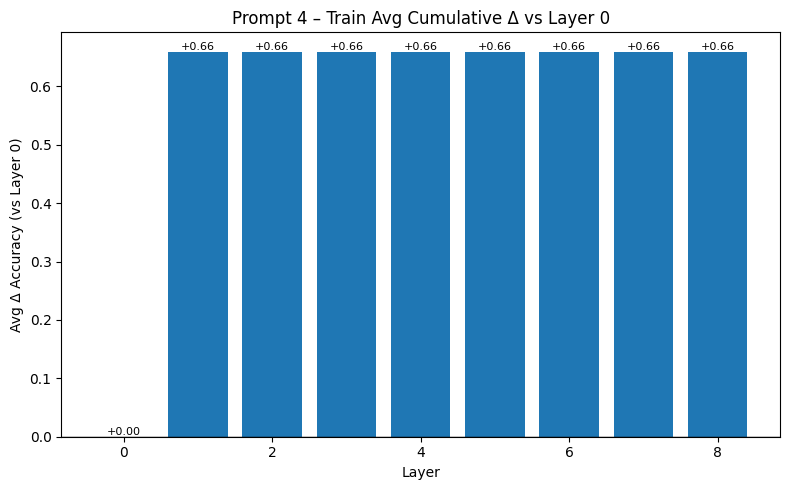

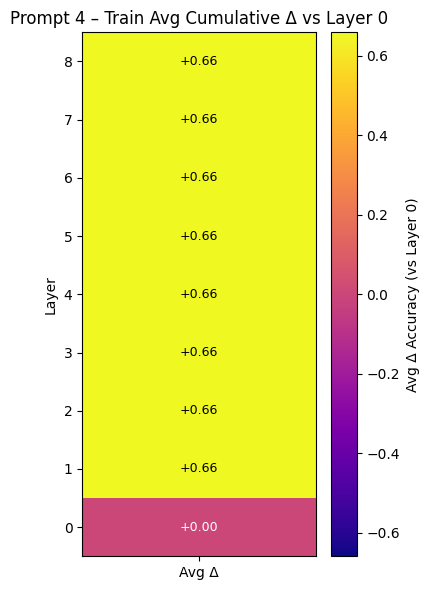

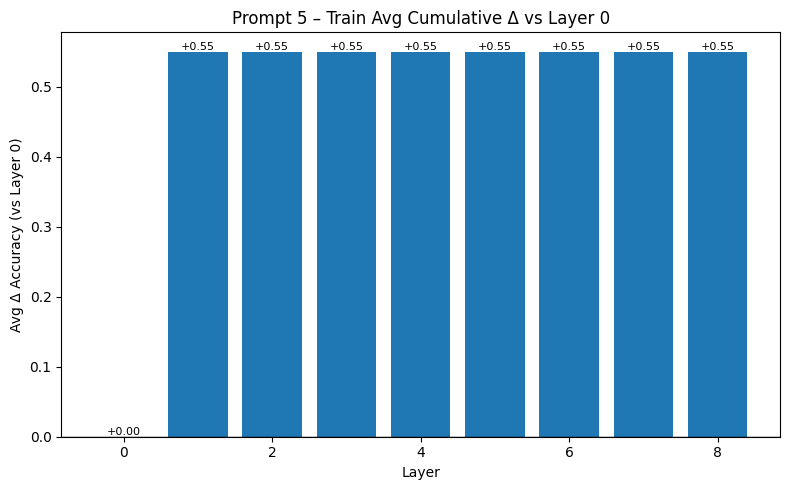

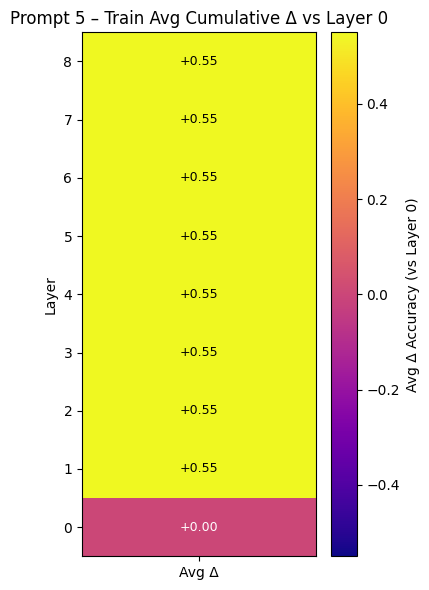

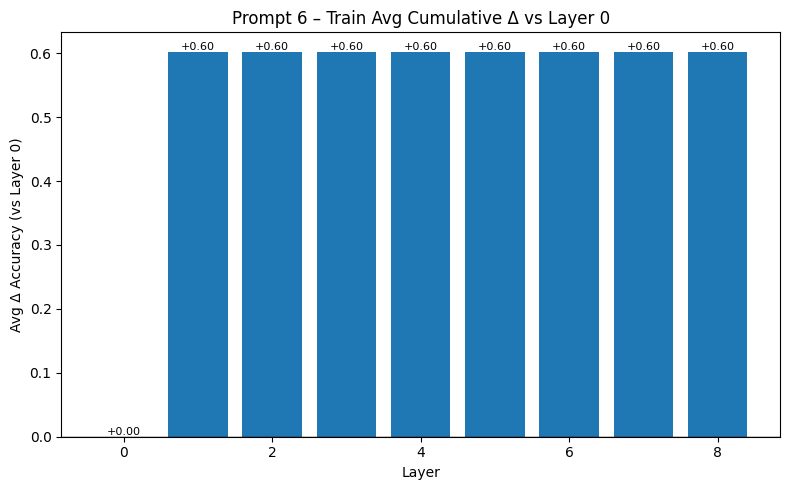

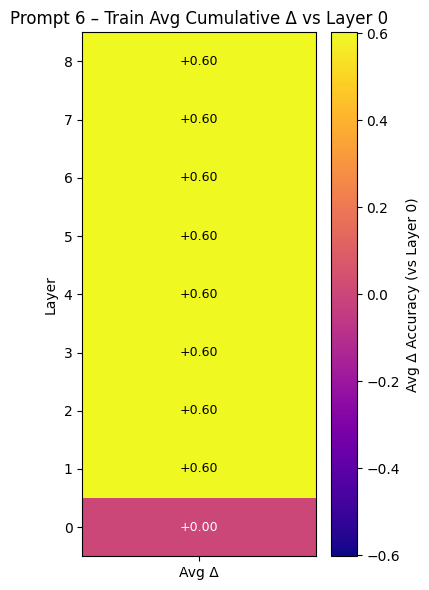

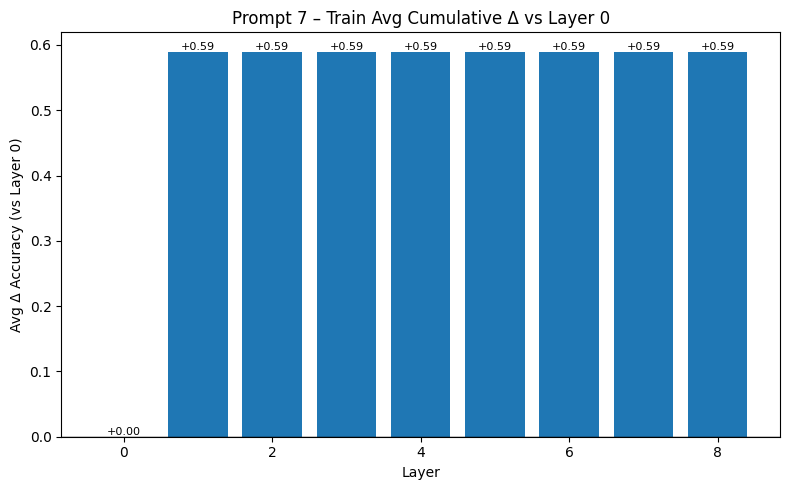

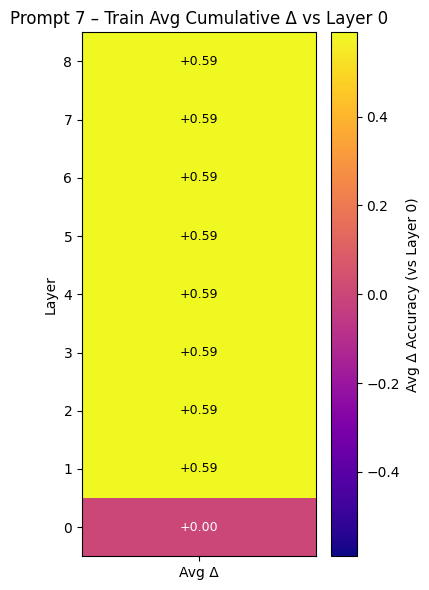

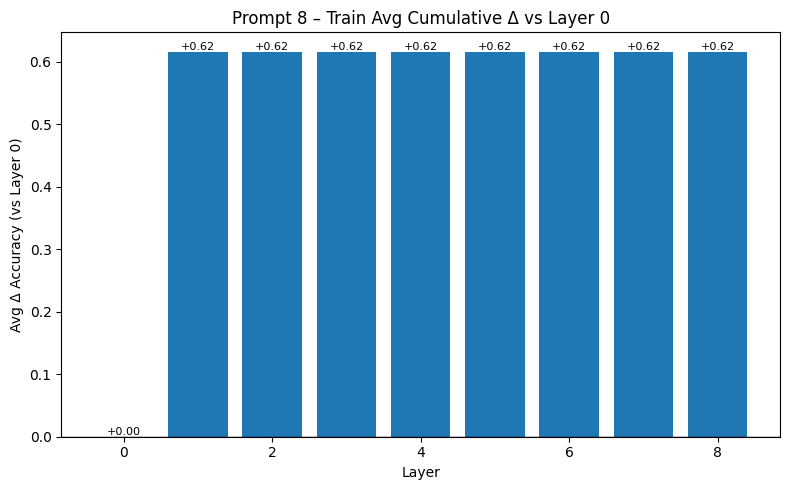

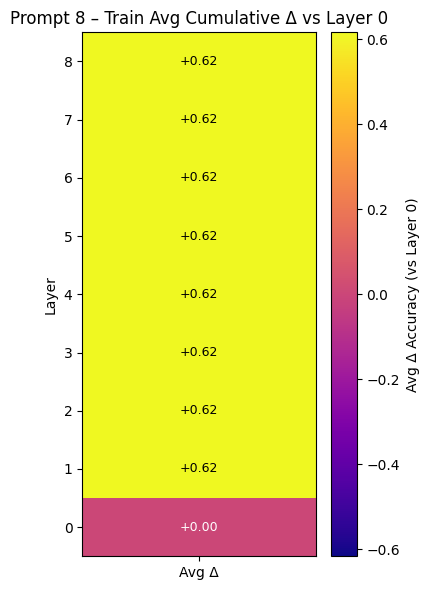

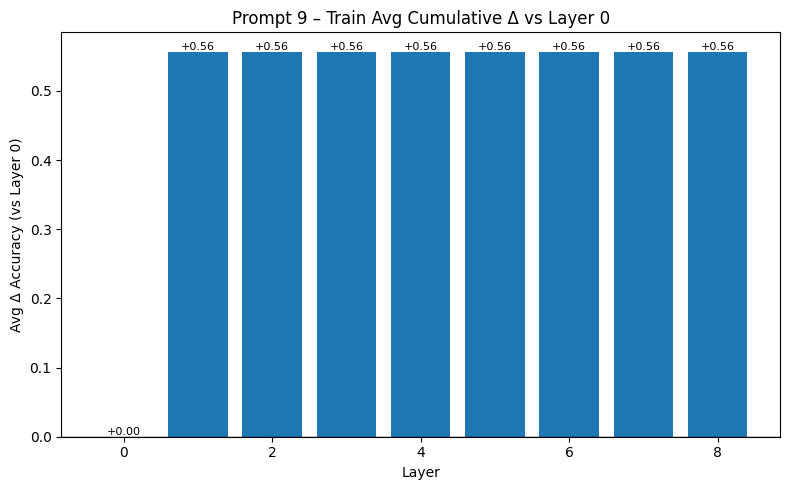

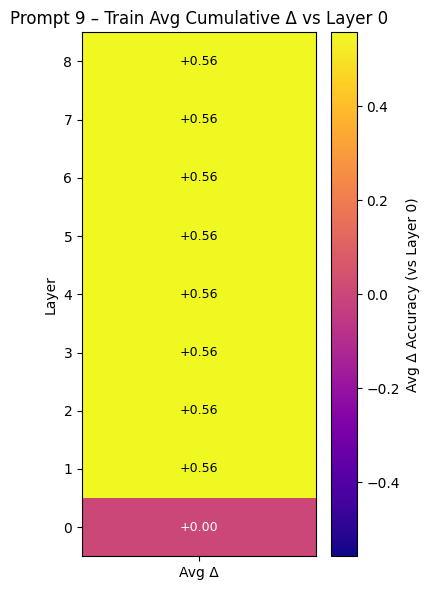

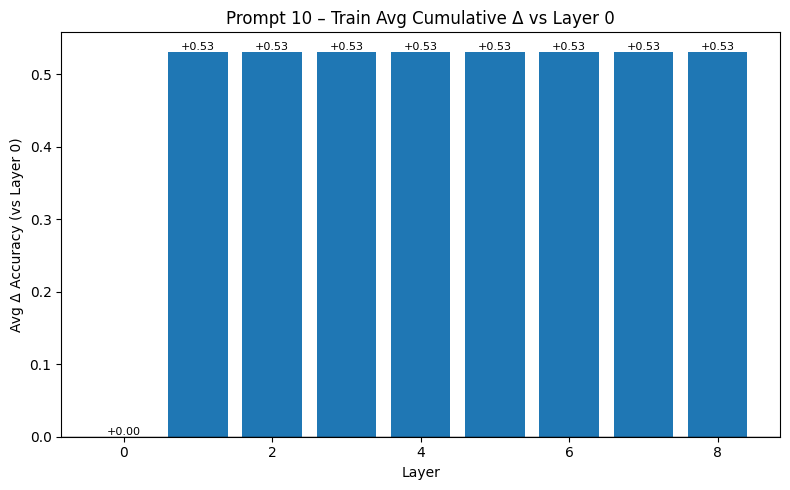

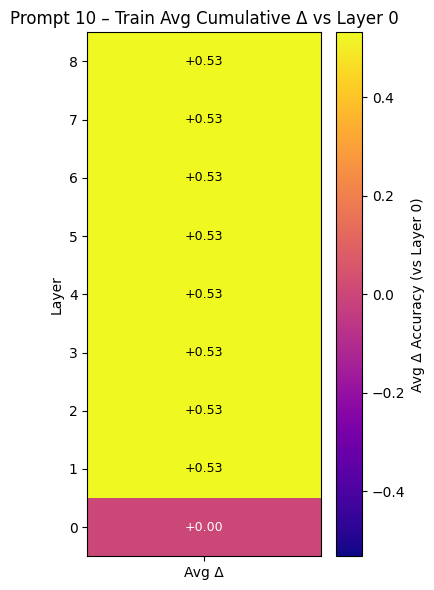

In [32]:
for col in train_prompt_cols:
    prompt_id = col.split("_")[1]

    avg_acc = avg_accuracy_per_layer(df, col)
    cum = cumulative_vs_layer0(avg_acc)

    plot_avg_layer_cumulative_bar(
        cum,
        f"Prompt {prompt_id} – Train Avg Cumulative Δ vs Layer 0"
    )

    plot_single_column_cumulative_heatmap(
        cum,
        f"Prompt {prompt_id} – Train Avg Cumulative Δ vs Layer 0"
    )


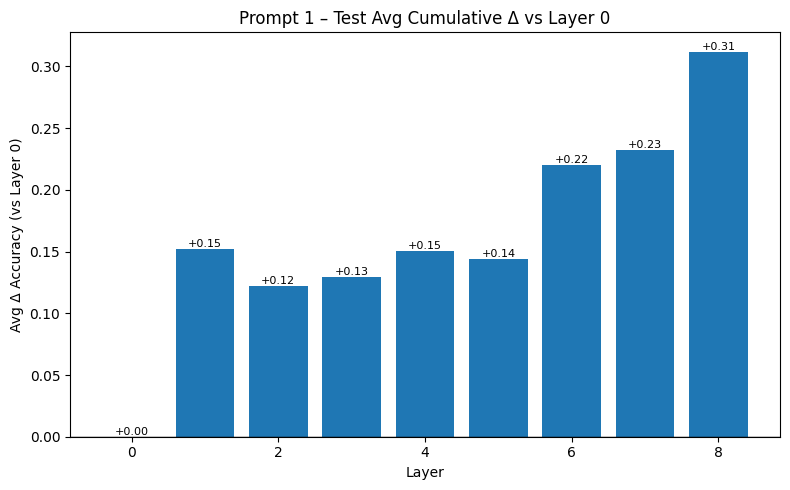

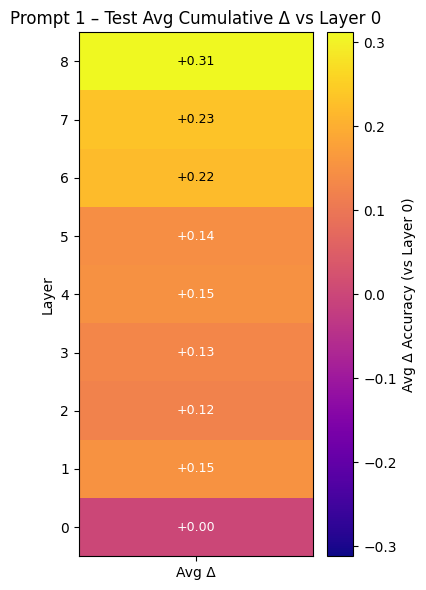

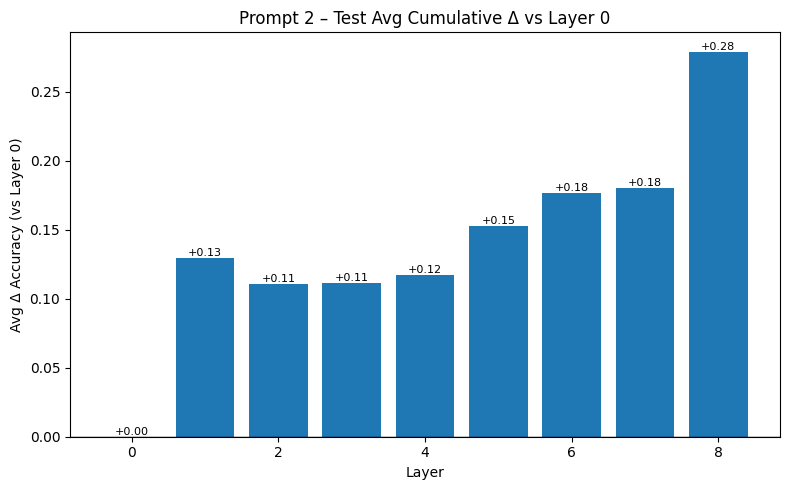

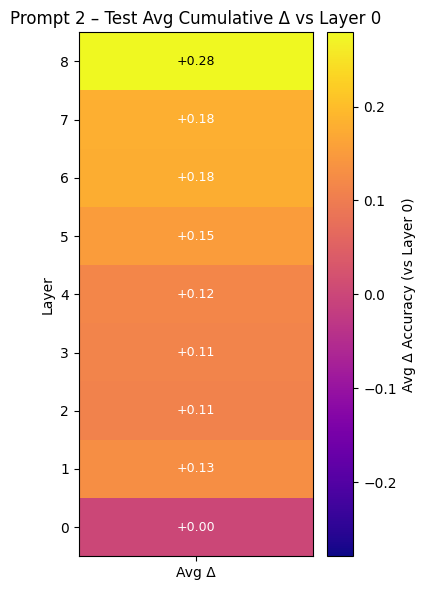

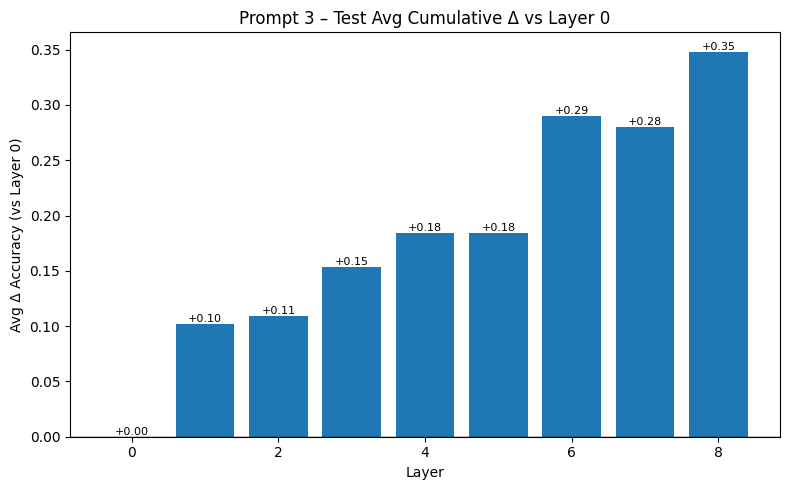

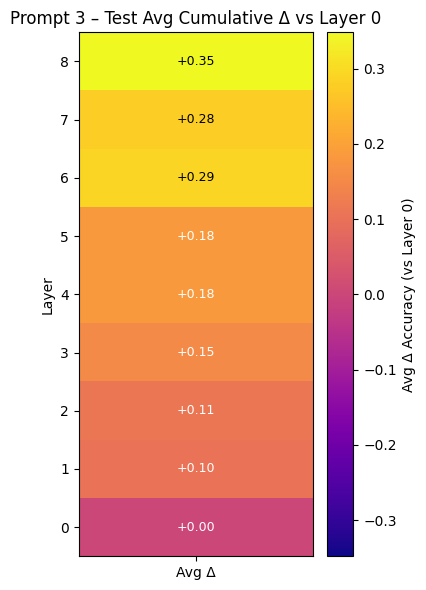

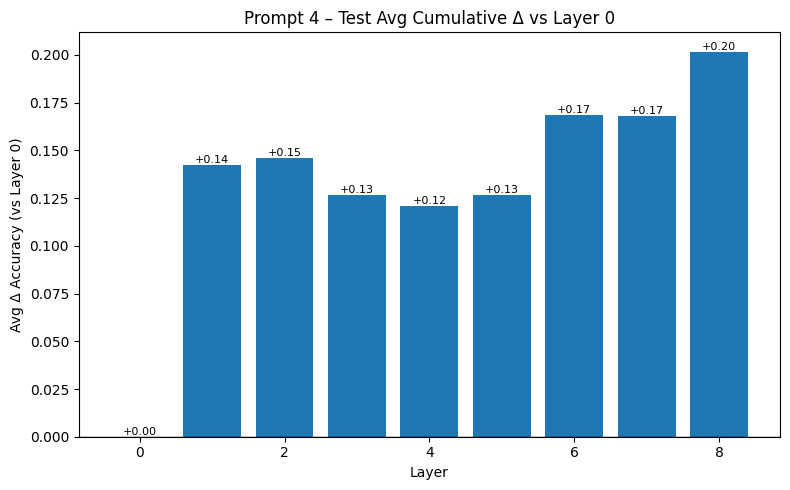

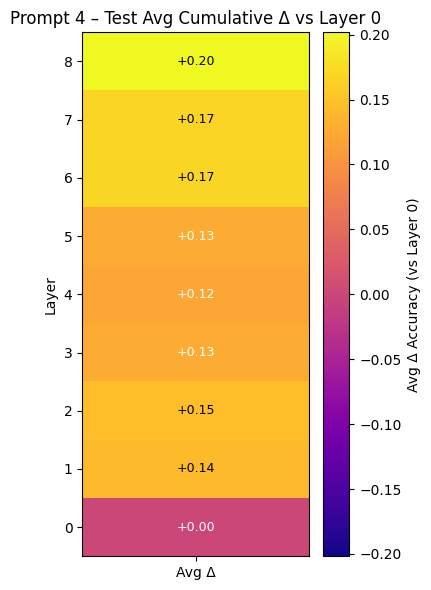

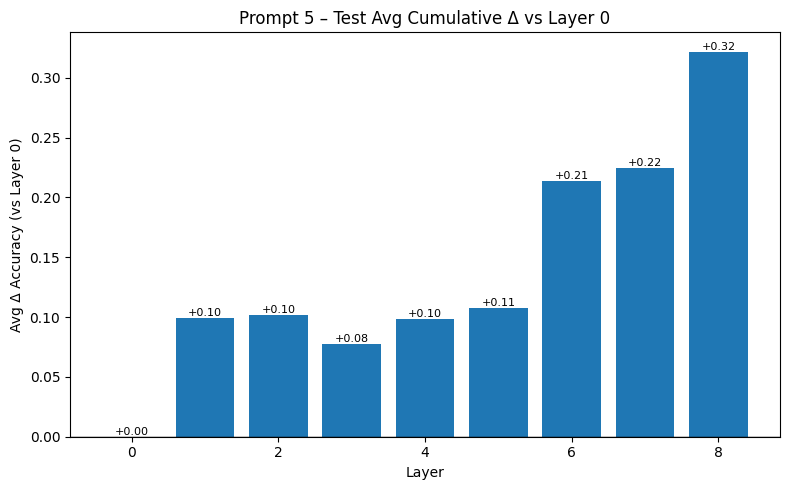

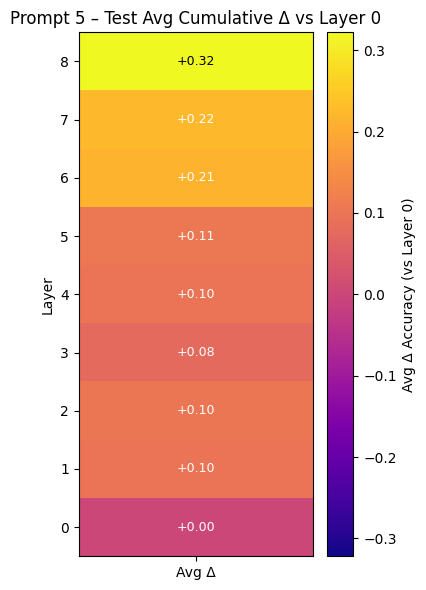

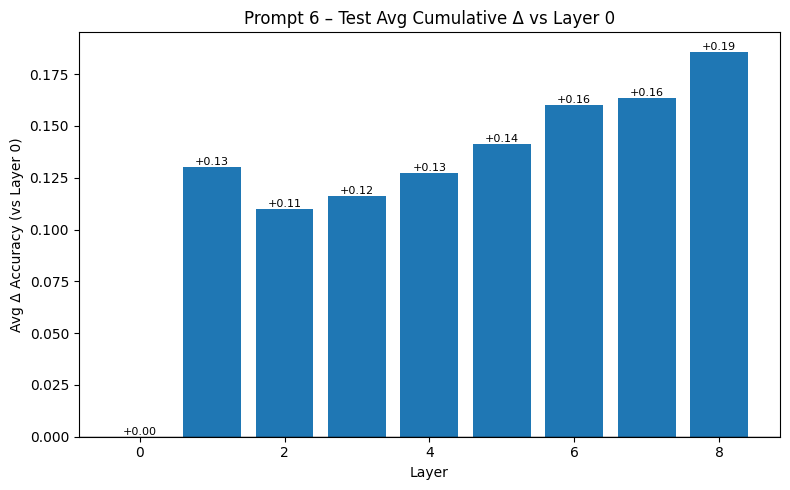

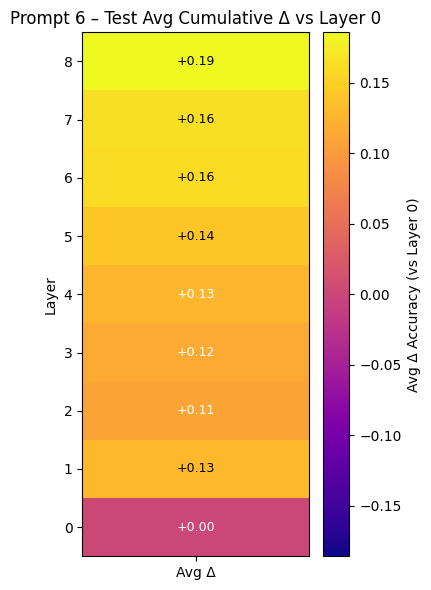

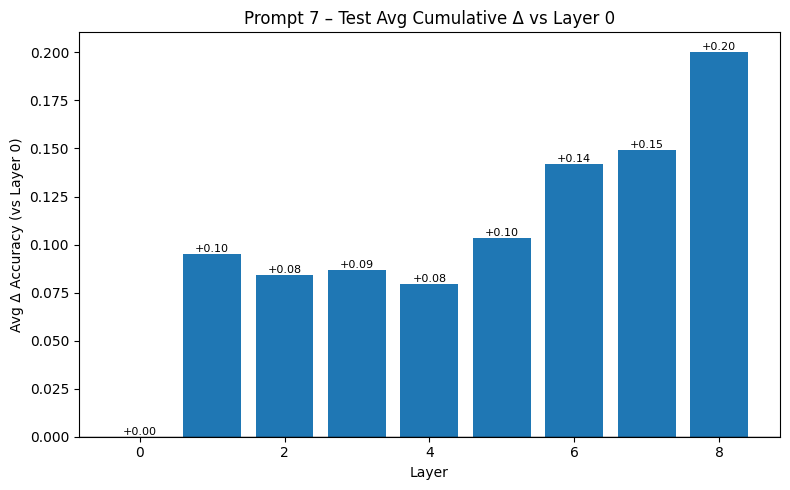

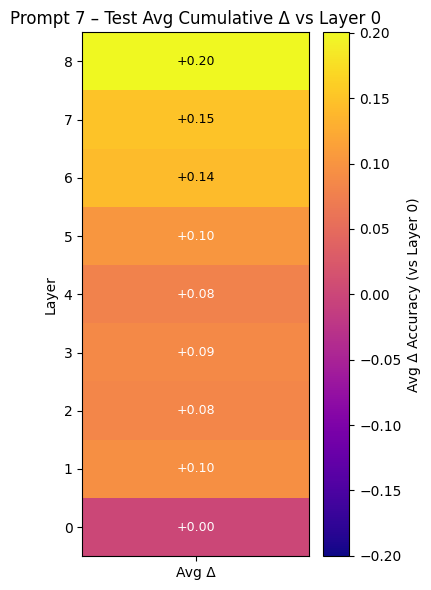

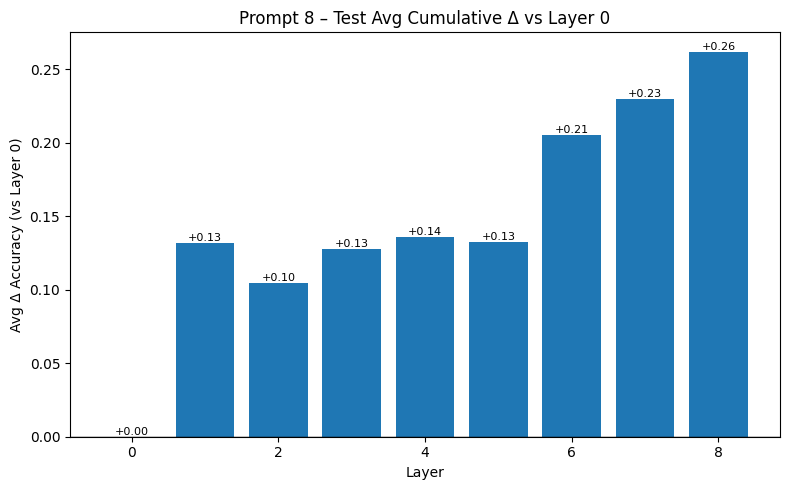

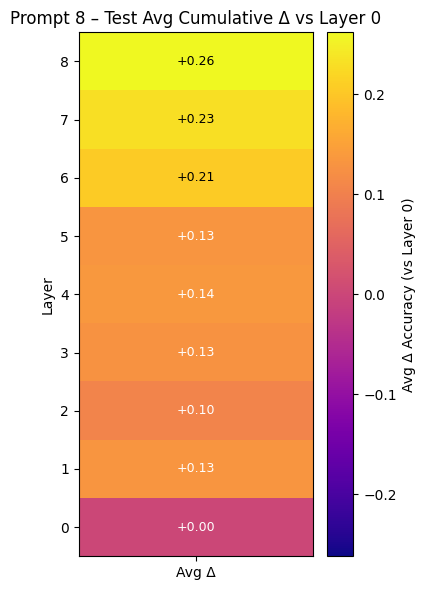

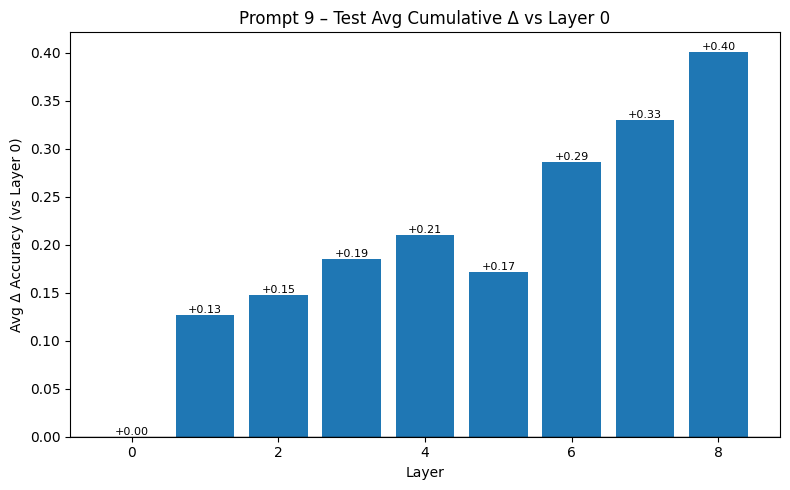

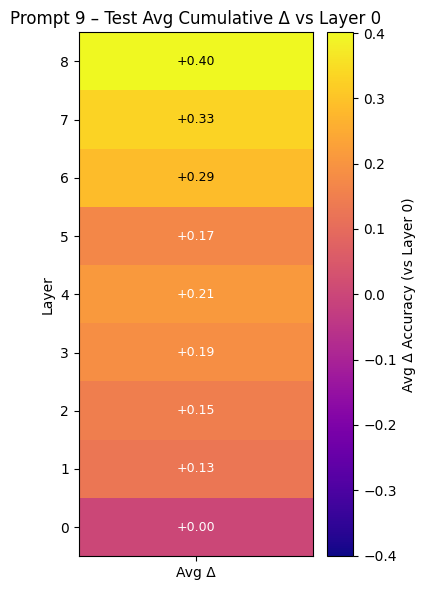

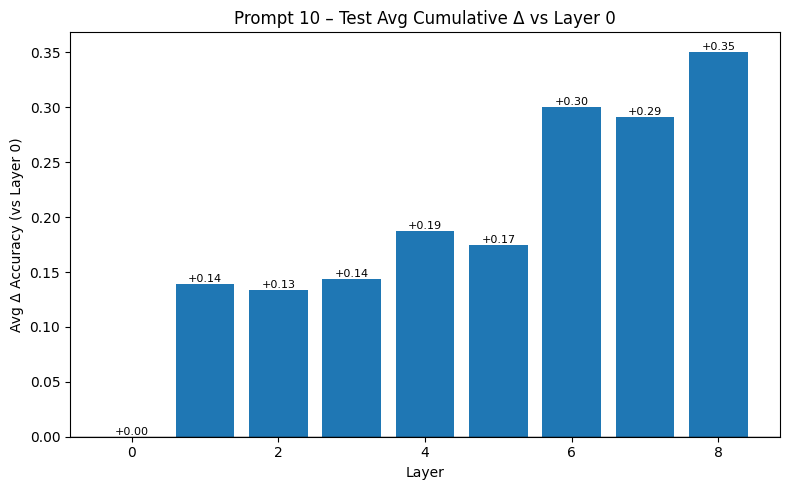

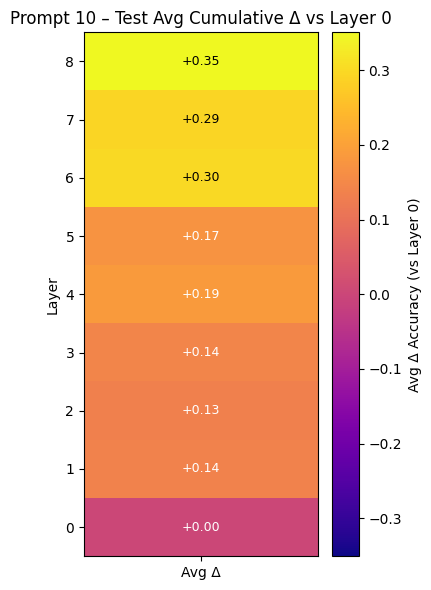

In [33]:
for col in test_prompt_cols:
    prompt_id = col.split("_")[1]

    avg_acc = avg_accuracy_per_layer(df, col)
    cum = cumulative_vs_layer0(avg_acc)

    plot_avg_layer_cumulative_bar(
        cum,
        f"Prompt {prompt_id} – Test Avg Cumulative Δ vs Layer 0"
    )

    plot_single_column_cumulative_heatmap(
        cum,
        f"Prompt {prompt_id} – Test Avg Cumulative Δ vs Layer 0"
    )
